In [74]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import data
import linear_regression

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 3a) Build the polynomial matrix of the independent variable

The polynomial matrix contains the independent variable raised to a different power in each column. For example, if $A$ originally has a column vector for the independent variable $\vec{x_1}$ ($A = [\vec{x_1}]$) and we wanted to make the above quadratic model, we would append $x_1^2$ ($A = [\vec{x_1}, \vec{x_1^2}]$).

**TODO:**
Implement and test `LinearRegression::make_polynomial_matrix` (*helper method*) that takes care of raising the independent variable samples to different powers.

##### Test `make_polynomial_matrix`

In [75]:
test_A = np.r_[1:10].reshape((9, 1))
test_p = 3

# Test cubic
lin_reg = linear_regression.LinearRegression(data.Data())
print(f'Your polynomial matrix:\n{lin_reg.make_polynomial_matrix(test_A, 3)}')

true_mat = '''
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
'''
print('It should look like:\n', true_mat)

Your polynomial matrix:
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
It should look like:
 
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]



### 3b) Add support for polynomial regression

This can be performed in 3 steps:


1. Implement the `LinearRegression::polynomial_regression` method to perform the polynomial regression (*alternate option: you may instead update your `linear_regression` method. If you decide to go this route, add a keyword argument for the polynomial degree with a default value of 1 to preserve compatability with regular linear regression.*).
2. Update `LinearRegression::predict`: Run `make_polynomial_matrix` on the "A" matrix that enters into the computation $y = Ac$ if `self.p > 1`.
3. Add support for plotting polynomials in `LinearRegression::scatter` by generalizing the plotted regression line to a regression polynomial if `self.p > 1`:
    - Getting your polynomial "x" values: Run `make_polynomial_matrix` on your evenly-spaced line sample points. To get the shapes to work out, you may need to add a trailing singleton dimension to your "x" sample points. For example, if you have 1000 "x" sample points, make the shape `(1000, 1)` rather than `(1000,)`.
    - Getting your polynomial "y" values: Use matrix multiplication with your polynomial regression model slopes and/or intercepts.

*There is no explicit test code here — visualizing the fit in the next subtask will help you debug!*

### 3c) Run a polynomial regression

In this subtask, you will debug your polynomial regression implementation and experiment fitting some data with it.

#### Test: Polynomial regression with linear model ($p = 1$)

- In the cell below, fit the `poly_data.csv` dataset using polynomial regression where the polynomial degree $p = 1$.
- Use `scatter` to plot the results.
- Print out the mean sum of squares error.

The plot created by running the below cell should "look right" to you.

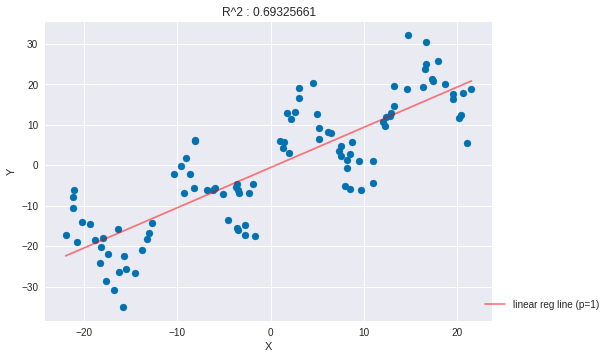

MSSE: 71.81095284569932


In [76]:
poly_filename = 'data/poly_data.csv'
poly_data = data.Data(poly_filename)
poly_lin_reg = linear_regression.LinearRegression(poly_data)
poly_lin_reg.linear_regression(['X'], 'Y')
poly_lin_reg.scatter('X','Y')
poly_lin_reg.show()
print(f'MSSE: {poly_lin_reg.m_sse}')

#### Test: polynomial regression with high degree polynomials

Repeat the steps from the $p = 1$ test above in the cell below, but this time try $p = 7$. 

*Your regression fit should not be a line!*

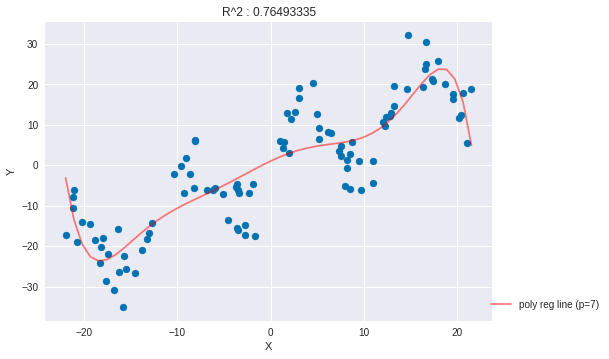

MSSE: 55.030880732781036


In [77]:
poly_filename = 'data/poly_data.csv'
poly_data = data.Data(poly_filename)
poly_lin_reg = linear_regression.LinearRegression(poly_data)
poly_lin_reg.linear_regression(['X'], 'Y', p = 7)
poly_lin_reg.scatter('X','Y')
poly_lin_reg.show()
print(f'MSSE: {poly_lin_reg.m_sse}')




**Question 5:** Describe the fit compared to `p=1` — is it better or worse? Why?



**Answer 5:** 

The fitting with p = 1 is much worse compared to p = 7 because by nature a regression with a polynomial values of one is a
linear regression emaning that it can only fit straight lines (not data with changing sloped ie curves) and when adding a
greated degree of regression more of the curve of the data can be captures especially at the ends of the range of the data. It can
also be seen that the p=7 fit is better because its r2 is 0.76 compared to a r2 of 0.69 with a normal linear regression (by its name can only fit a straight line)
and their msses are about 71 for p=1 and 55 for p=7 meaning p=7 has less of an error

**Question 6:** Describe what happens visually and in terms of the $R^2$ and MSE values as you experiment with the polynomial degree between 1 and 7.


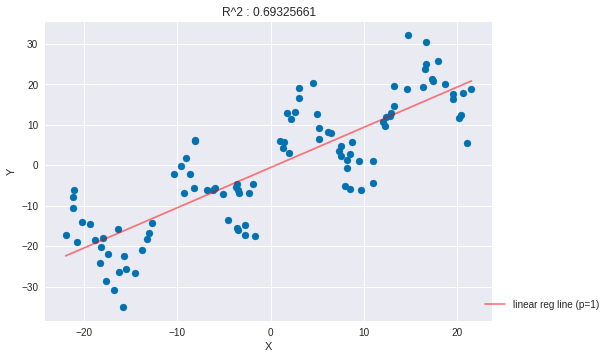

MSSE for p=1: 71.81095284569932




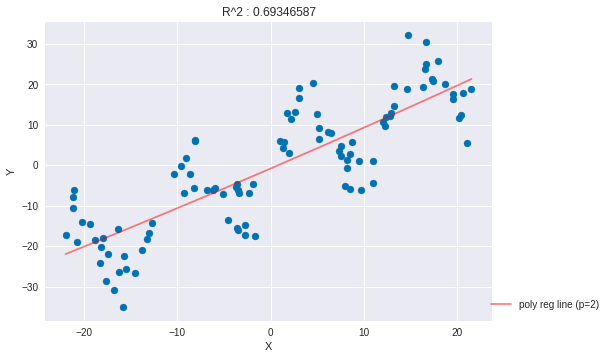

MSSE for p=2: 71.76196386502876




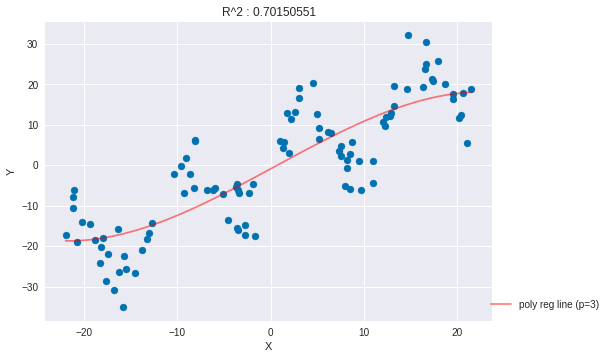

MSSE for p=3: 69.87982260694507




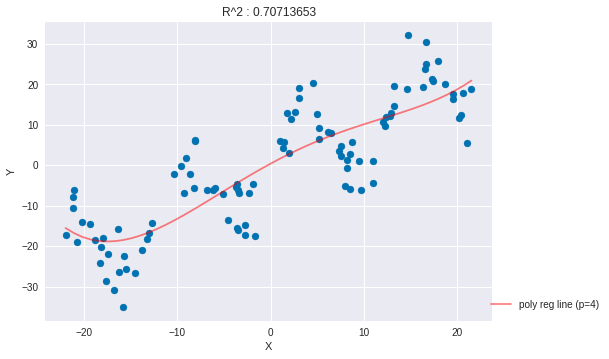

MSSE for p=4: 68.56155885782587




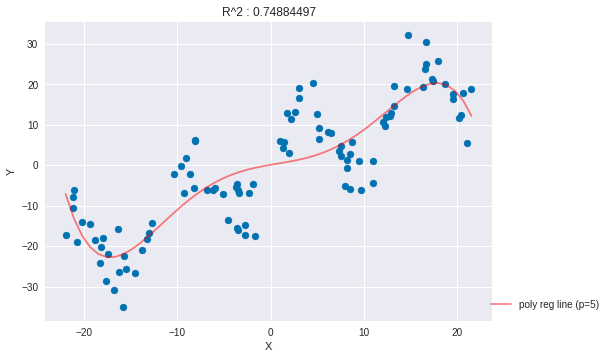

MSSE for p=5: 58.797296870783136




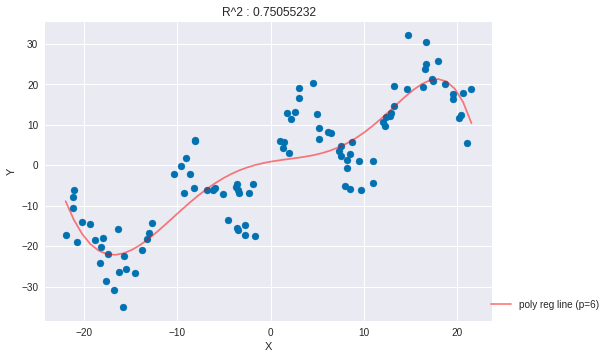

MSSE for p=6: 58.39759290430363




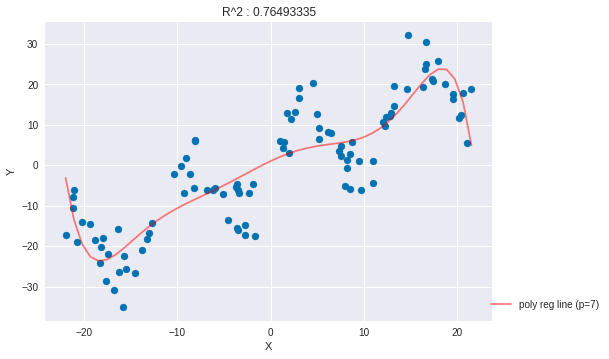

MSSE for p=7: 55.030880732781036




In [78]:
# For question 6 I am going to loop through p 1 to 7 and 
# do all the pair plots and their msses

for i in range(7):
    poly = i +1
    poly_lin_reg.linear_regression(['X'], 'Y', p = poly)
    poly_lin_reg.scatter('X','Y')
    poly_lin_reg.show()
    print(f'MSSE for p={poly}: {poly_lin_reg.m_sse}\n\n')


**Answer 6:**

It shows the trend that as p increases the R2 value (measure of fit) increases, and the msse (mean sum of squared errors) is decreased meaning the regression is more accurate (also doesnt seem to over fit)

## Task 4: Overfitting

In this subtask, you will experiment with how polynomial regression generalize to data not used to fit the regression model.

### 4a) Create fit and validation sets

The `poly_data.csv` dataset has 100 samples ($N=100$). In the cell below, split these samples into two separate "datasets" and create 2 `Data` objects representing:
- The first 50% of samples will be used to fit the regression model (i.e. run linear regression on these samples). We will call this the **fit set** (data used to fit the regression).
- The second 50% of samples will be set aside and only used to check how well the fitted regression generalizes to new data. We will call this the **validation set**.

*Hint: There is a helpful `Data` method for paring down a dataset into a certain range of samples.*

In [79]:
poly_filename = 'data/poly_data.csv'
fit_set = data.Data(poly_filename)
fit_set.limit_samples(0,50)
validation_set = data.Data(poly_filename)
validation_set.limit_samples(50,100)
print(fit_set)
print(validation_set)


-------------------------------
data/poly_data.csv (50x2)
Headers:
	X	Y
-------------------------------
 Showing first 5/50 rows.
2.147	11.382
9.465	1.034
4.52	20.251
1.974	2.89
-3.358	-6.809

-------------------------------
data/poly_data.csv (50x2)
Headers:
	X	Y
-------------------------------
 Showing first 5/50 rows.
-3.65	-4.658
9.69	-6.107
-21.986	-17.271
-8.694	-2.22
-15.536	-25.608


Printing the `Data` object storing the fit set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    2.147	11.382
    9.465	1.034
    4.52	20.251
    1.974	2.89
    -3.358	-6.809

    -------------------------------

Printing the `Data` object storing the validation set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    -3.65	-4.658
    9.69	-6.107
    -21.986	-17.271
    -8.694	-2.22
    -15.536	-25.608

    -------------------------------

### 4b) Check fit generalization on validation set

Here is the process for checking how well your fitted linear regression model generalizes to the validation data:
1. Create `Data` objects for both the fit and validation data sets (*as you have already done*).
2. Run linear regression on the fit set.
3. Create a new `LinearRegression` object associated with the validation data.
4. Copy over the fitted slope and intercept coefficients associated with the fit set to the validation set `LinearRegression` object.
5. Create a scatterplot by calling `scatter` to show the validation data and the regression curve that uses the coefficients fitted on the fit dataset (copied over in Step 4).
6. Calculate and report fit statistics (e.g. MSSE, $R^2$).

Before doing this, implement the following methods to help you copy over the fitted slope, intercept and other data from your fit set `LinearRegression` object:

- `get_fitted_slope`: return the fitted regression slopes.
- `get_fitted_intercept`: return the fitted regression intercept.
- `initialize(ind_vars, dep_var, slope, intercept, p)`: set fields based on passed in parameter values.

#### Check overfitting with $p = 7$ polynomial regression model

In the cell below:

1. Fit a polynomial regression model with $p = 7$ on the fit set.
2. Create 2 scatter plots:
    - Showing the fit set and regression curve fitted to it.
    - Showing the validation set and regression curve that uses the fitted coefficients to the **fit set**.
3. Compute and print the MSSE for both the fit and validation sets.

Use the 6 step process above to guide you through the setup.

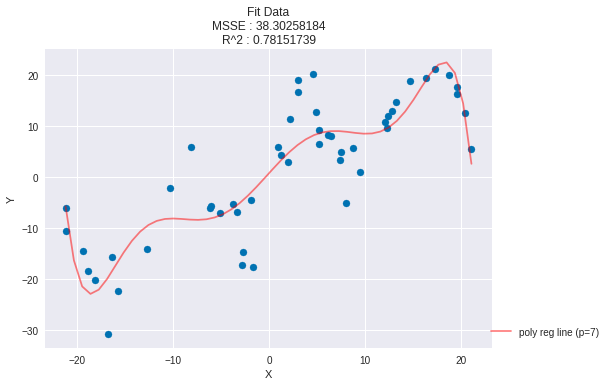

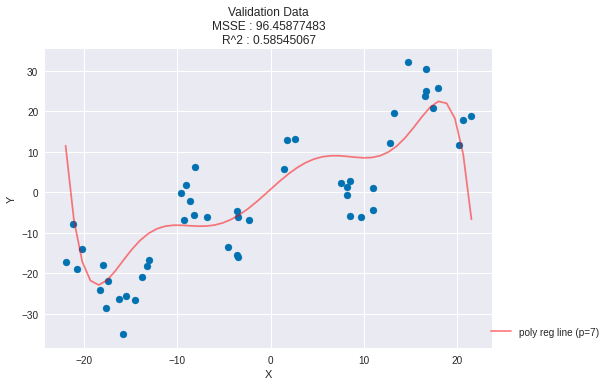

In [80]:

poly_lin_reg_fit = linear_regression.LinearRegression(fit_set)
poly_lin_reg_fit.linear_regression(['X'], 'Y', p = 7)

poly_lin_reg_fit.scatter('X','Y', title = f'Fit Data\nMSSE : {poly_lin_reg_fit.m_sse:.8f}')
poly_lin_reg_fit.show()



poly_lin_reg_val = linear_regression.LinearRegression(validation_set)
fit_slopes =  poly_lin_reg_fit.get_fitted_slope()
fit_intercept= poly_lin_reg_fit.get_fitted_intercept()
poly_lin_reg_val.initialize(['X'], 'Y', p = 7, slope = fit_slopes,
                       intercept = fit_intercept)
poly_lin_reg_val.scatter('X','Y', title = f'Validation Data\nMSSE : {poly_lin_reg_val.m_sse:.8f}')
poly_lin_reg_val.show()

**Question 7:** Describe how the fitted coefficients obtained for the fit set generalize to the validation set. Do they do a good or bad job? Why?

**Question 8:** Does the generalization improve or worsen for polynomial degrees < 7? Are Back up your observations with numbers (e.g. MSSE, $R^2$).


**Answer 7:**

**Answer 8:** 
To start I am first going to plot the fit and validation plot for all values (continue below)




Plots for p = 1


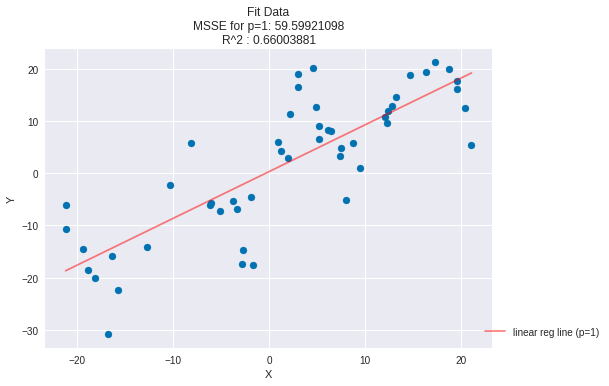

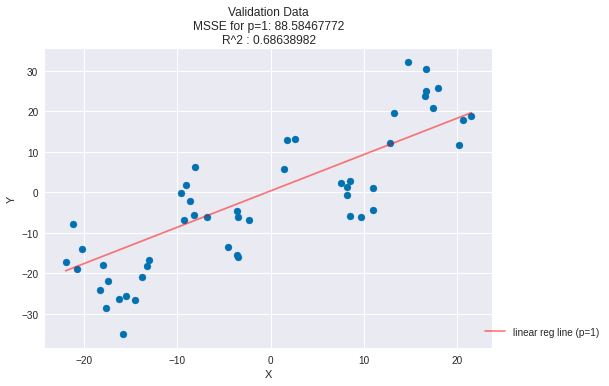




Plots for p = 2


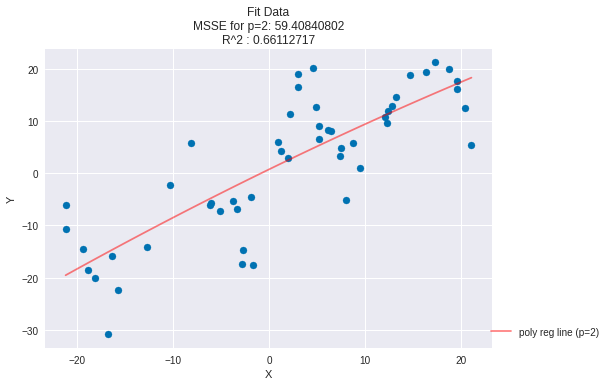

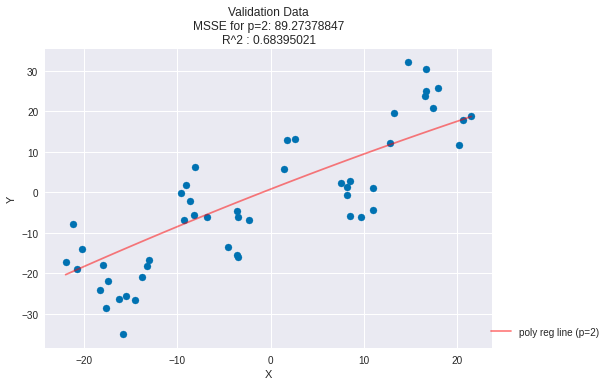




Plots for p = 3


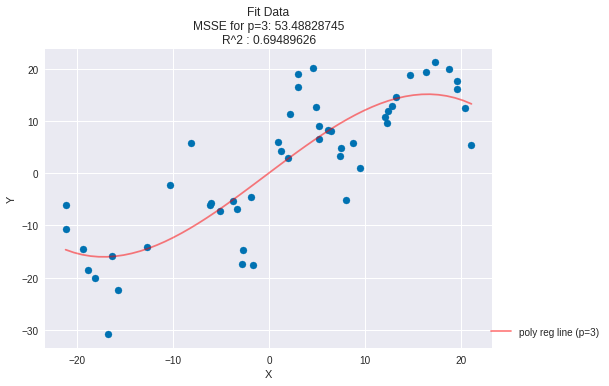

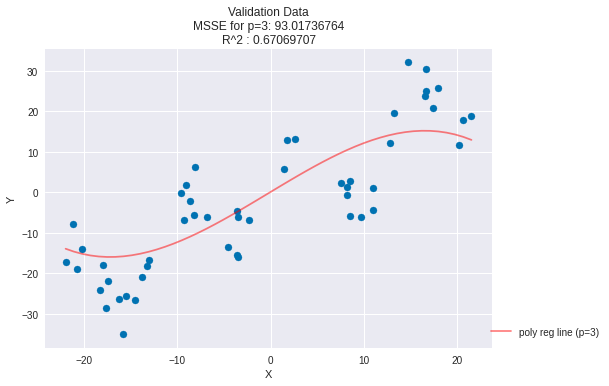




Plots for p = 4


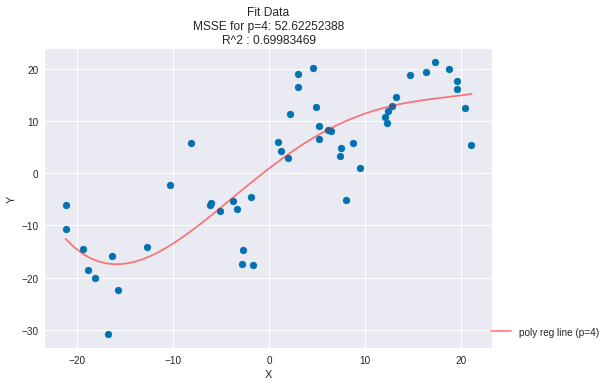

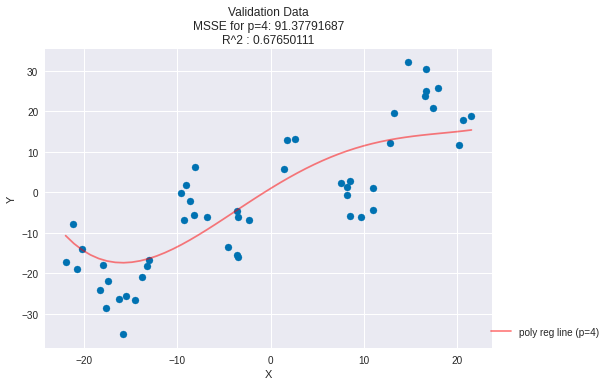




Plots for p = 5


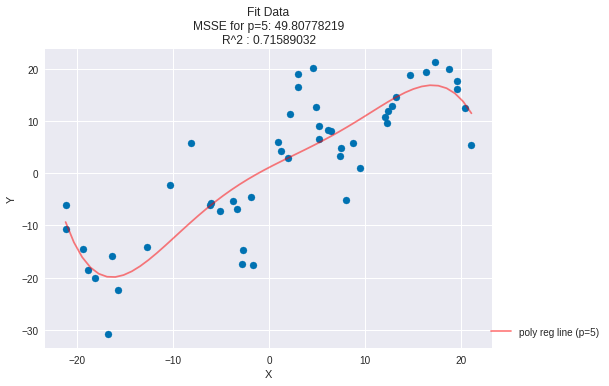

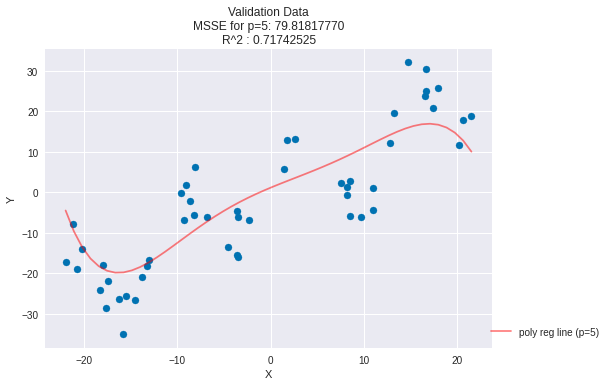




Plots for p = 6


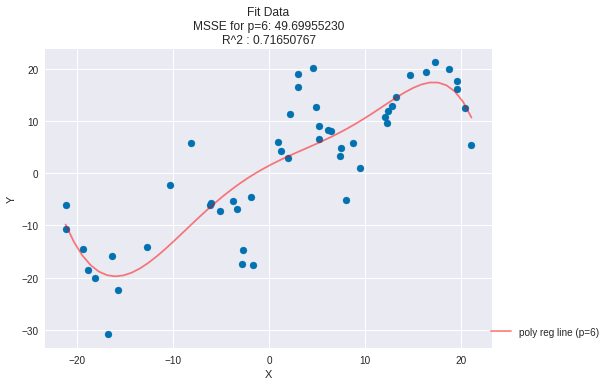

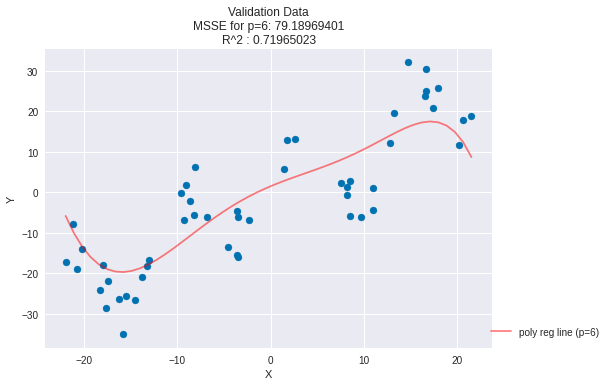




Plots for p = 7


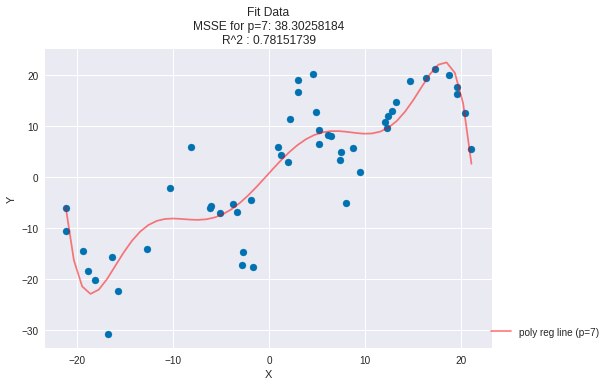

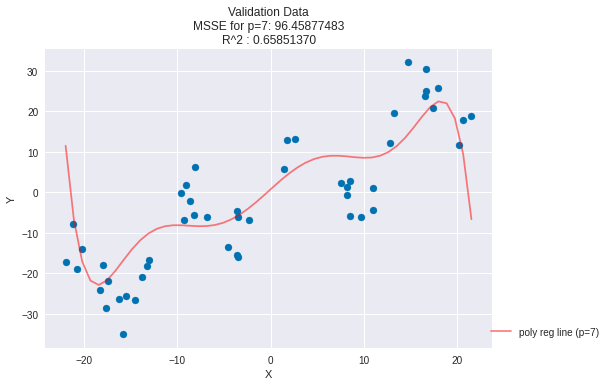

In [216]:
# dict to hold the p val of the regression as the key and its value holds a dict with the
# fit and validation r^2 and msse
poly_results_dict = {}
for i in range(7):
    poly= i+1
    print(f'\n\n\nPlots for p = {poly}')
    #dict to hold r2 and msse for fit and validation set
    fit_val_dict = {}
    
    poly_lin_reg_fit = linear_regression.LinearRegression(fit_set)
    poly_lin_reg_fit.linear_regression(['X'], 'Y', p = poly)

    fit_val_dict['fit'] = [poly_lin_reg_fit.R2 , poly_lin_reg_fit.m_sse]
    
    poly_lin_reg_fit.scatter('X','Y', title = f'Fit Data\nMSSE for p={poly}: {poly_lin_reg_fit.m_sse:.8f}')
    poly_lin_reg_fit.show()



    poly_lin_reg_val = linear_regression.LinearRegression(validation_set)
    fit_slopes =  poly_lin_reg_fit.get_fitted_slope()
    fit_intercept= poly_lin_reg_fit.get_fitted_intercept()
    poly_lin_reg_val.initialize(['X'], 'Y', p = poly, slope = fit_slopes,
                           intercept = fit_intercept)
    
    fit_val_dict['val'] = [poly_lin_reg_val.R2 , poly_lin_reg_val.m_sse]
    poly_results_dict[poly] = fit_val_dict
    
    poly_lin_reg_val.scatter('X','Y', title = f'Validation Data\nMSSE for p={poly}: {poly_lin_reg_val.m_sse:.8f}')
    poly_lin_reg_val.show()

In [217]:
for p_val, results_dict in poly_results_dict.items():
    print(f'\nFor p={p_val}:\n\tFit:  R2={results_dict["fit"][0]}  ,  MSSE={results_dict["fit"][1]}' + 
        f'\n\tValidation:  R2={results_dict["val"][0]}  ,  MSSE={results_dict["val"][1]}'+
         f'\n\n\tDifference Between Fit and Val: R2={results_dict["fit"][0] - results_dict["val"][0]} ' +
         f', MSSE={results_dict["fit"][1] - results_dict["val"][1]}')



For p=1:
	Fit:  R2=0.6600388084752988  ,  MSSE=59.59921097570393
	Validation:  R2=0.6863898169307059  ,  MSSE=88.58467771864787

	Difference Between Fit and Val: R2=-0.026351008455407054 , MSSE=-28.985466742943935

For p=2:
	Fit:  R2=0.6611271719036671  ,  MSSE=59.40840801582888
	Validation:  R2=0.6839502059825308  ,  MSSE=89.27378847228445

	Difference Between Fit and Val: R2=-0.022823034078863658 , MSSE=-29.86538045645557

For p=3:
	Fit:  R2=0.6948962639463439  ,  MSSE=53.48828745123431
	Validation:  R2=0.6706970726109889  ,  MSSE=93.01736764114354

	Difference Between Fit and Val: R2=0.024199191335354975 , MSSE=-39.52908018990923

For p=4:
	Fit:  R2=0.6998346852704935  ,  MSSE=52.62252388256084
	Validation:  R2=0.6765011063336471  ,  MSSE=91.37791686898464

	Difference Between Fit and Val: R2=0.0233335789368464 , MSSE=-38.7553929864238

For p=5:
	Fit:  R2=0.7158903162488048  ,  MSSE=49.80778219474409
	Validation:  R2=0.7174252481842569  ,  MSSE=79.81817770086117

	Difference Betwee

**Answer 8:**
From the plots it appears that the best polynomial value for the prediction data is a p val of 6 because it gives the
highest R2 value of around 0.6 and this makes sense because when looking at the data there are 6 different curves in the data
linning up with the different polynomials of the data (makes sense for a polonomial with x all the way up to the power of 6 ie x^6)



**Question 9:** Are there any values/ranges of polynomial degrees that generalize acceptably to the validation set? Why do you think so?

**Question 10:** What happens when you increase the polynomial degree above 7, in the range $7-13$? Why do you think this happens? Back up your observations with numbers (e.g. MSSE, $R^2$).

**Answer 9:** 

I would say 5 to seven because they are a close range for the maximum R2 value obtained

**Answer 10:**
First I am going to plot like I did for question 8




Plots for p = 7


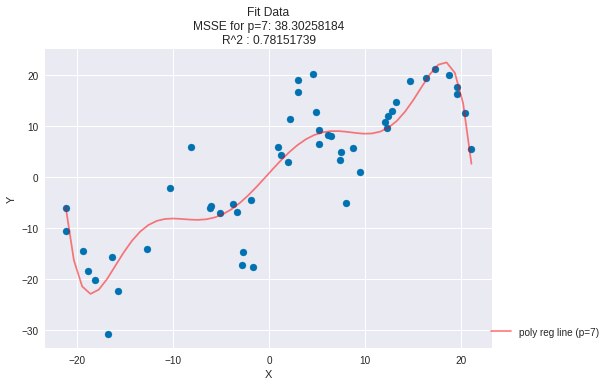

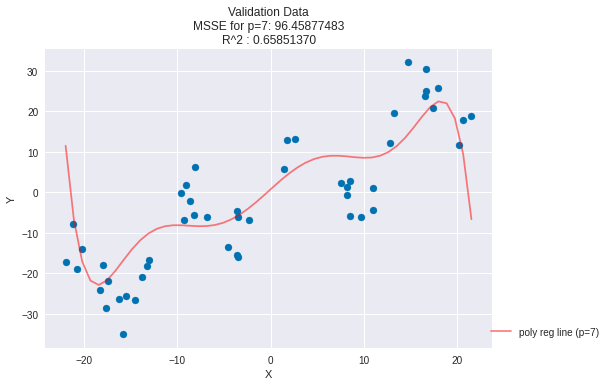




Plots for p = 8


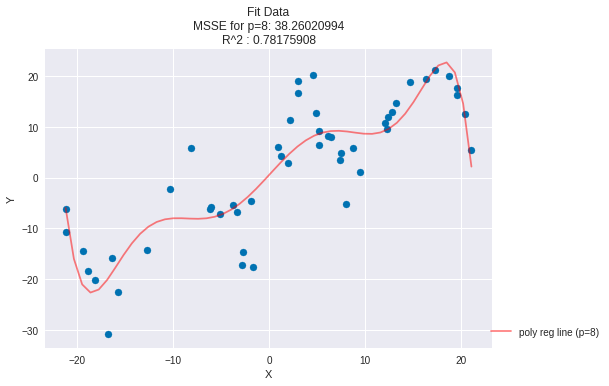

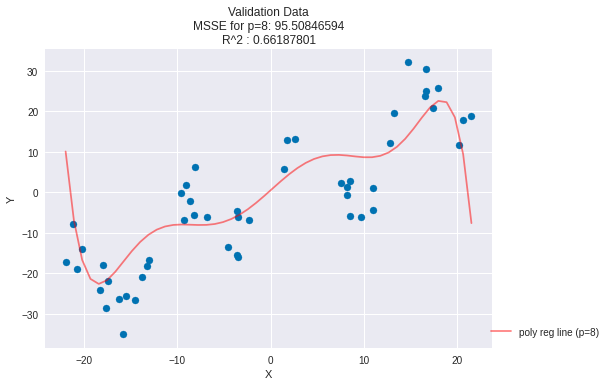




Plots for p = 9


/home/matt3080/PycharmProjects/cs251/project3/linear_regression.py:211: RuntimeWarning: divide by zero encountered in double_scalars
  self.adj_R2 = 1 - ((1 - self.R2) * (n - 1) / (n - k - 1))


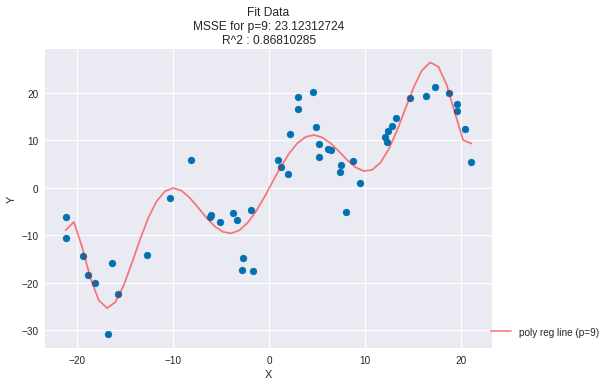

/home/matt3080/PycharmProjects/cs251/project3/linear_regression.py:211: RuntimeWarning: divide by zero encountered in double_scalars
  self.adj_R2 = 1 - ((1 - self.R2) * (n - 1) / (n - k - 1))


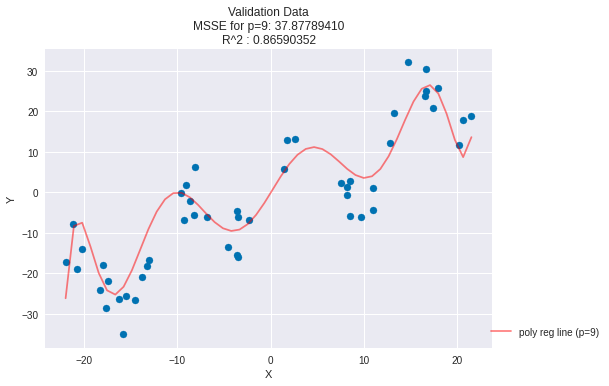




Plots for p = 10


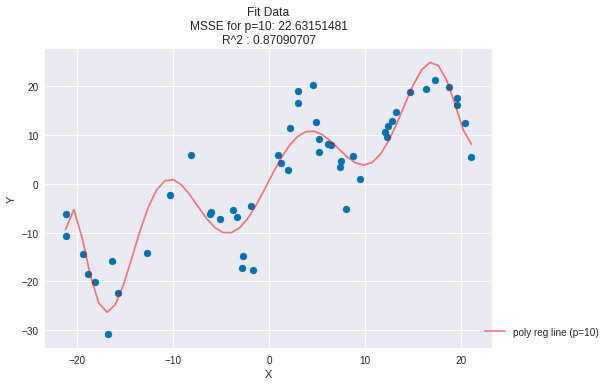

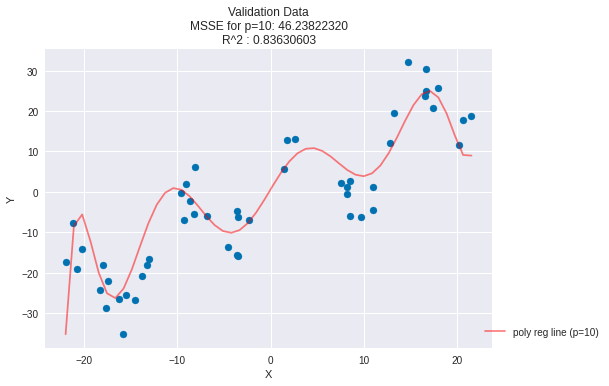




Plots for p = 11


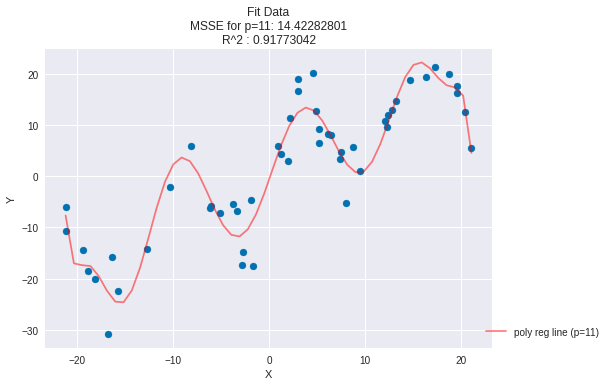

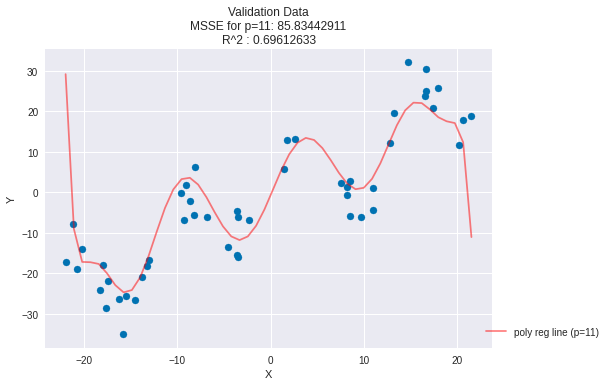




Plots for p = 12


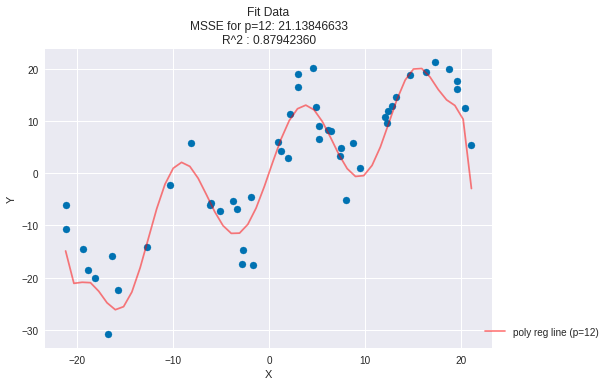

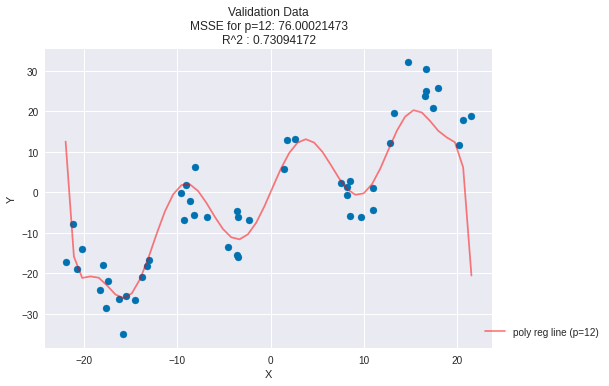




Plots for p = 13


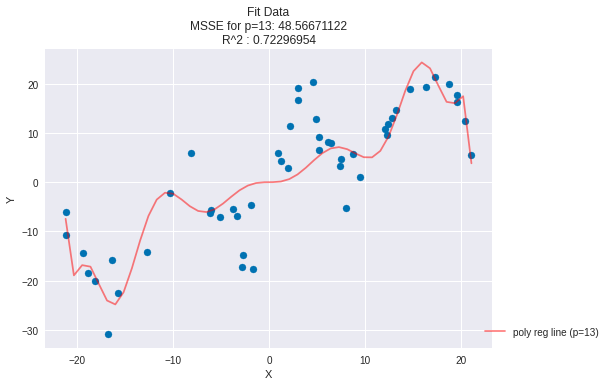

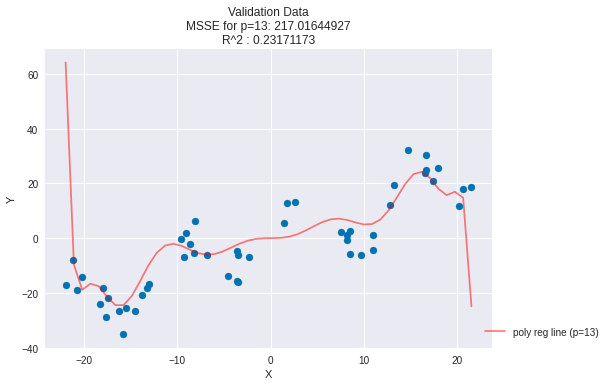

In [218]:
# dict to hold the p val of the regression as the key and its value holds a dict with the
# fit and validation r^2 and msse
poly_results_dict = {}
for i in range(7):
    poly= i+7
    print(f'\n\n\nPlots for p = {poly}')
    #dict to hold r2 and msse for fit and validation set
    fit_val_dict = {}
    
    poly_lin_reg_fit = linear_regression.LinearRegression(fit_set)
    poly_lin_reg_fit.linear_regression(['X'], 'Y', p = poly)

    fit_val_dict['fit'] = [poly_lin_reg_fit.R2 , poly_lin_reg_fit.m_sse]
    
    poly_lin_reg_fit.scatter('X','Y', title = f'Fit Data\nMSSE for p={poly}: {poly_lin_reg_fit.m_sse:.8f}')
    poly_lin_reg_fit.show()



    poly_lin_reg_val = linear_regression.LinearRegression(validation_set)
    fit_slopes =  poly_lin_reg_fit.get_fitted_slope()
    fit_intercept= poly_lin_reg_fit.get_fitted_intercept()
    poly_lin_reg_val.initialize(['X'], 'Y', p = poly, slope = fit_slopes,
                           intercept = fit_intercept)
    
    fit_val_dict['val'] = [poly_lin_reg_val.R2 , poly_lin_reg_val.m_sse]
    poly_results_dict[poly] = fit_val_dict
    
    poly_lin_reg_val.scatter('X','Y', title = f'Validation Data\nMSSE for p={poly}: {poly_lin_reg_val.m_sse:.8f}')
    poly_lin_reg_val.show()

In [219]:
for p_val, results_dict in poly_results_dict.items():
    print(f'\nFor p={p_val}:\n\tFit:  R2={results_dict["fit"][0]}  ,  MSSE={results_dict["fit"][1]}' + 
        f'\n\tValidation:  R2={results_dict["val"][0]}  ,  MSSE={results_dict["val"][1]}'+
         f'\n\n\tDifference Between Fit and Val: R2={results_dict["fit"][0] - results_dict["val"][0]} ' +
         f', MSSE={results_dict["fit"][1] - results_dict["val"][1]}')





For p=7:
	Fit:  R2=0.7815173867606513  ,  MSSE=38.302581840518535
	Validation:  R2=0.6585136977333772  ,  MSSE=96.45877482536189

	Difference Between Fit and Val: R2=0.1230036890272741 , MSSE=-58.15619298484335

For p=8:
	Fit:  R2=0.78175908128517  ,  MSSE=38.26020993655545
	Validation:  R2=0.6618780102734463  ,  MSSE=95.50846594447654

	Difference Between Fit and Val: R2=0.11988107101172374 , MSSE=-57.24825600792109

For p=9:
	Fit:  R2=0.8681028530507351  ,  MSSE=23.123127239514606
	Validation:  R2=0.865903521801757  ,  MSSE=37.87789410451742

	Difference Between Fit and Val: R2=0.002199331248978087 , MSSE=-14.75476686500281

For p=10:
	Fit:  R2=0.8709070705125166  ,  MSSE=22.631514807586996
	Validation:  R2=0.8363060292665574  ,  MSSE=46.2382231979494

	Difference Between Fit and Val: R2=0.034601041245959197 , MSSE=-23.606708390362407

For p=11:
	Fit:  R2=0.9177304243592797  ,  MSSE=14.422828010169116
	Validation:  R2=0.6961263310959493  ,  MSSE=85.83442911067918

	Difference Betwee

**Answer 10 Continued:**

Here it is very interesting the out comes as p increases up until 13 (p=7 to p=12) The fit of the data that the
regression is done on gets better and better with R2 increasing all the way to 0.95 when p=12 for the fit data,
however there is overfitting because when testing how the regression fits the test data the R2 value is 0.71. There is this loss of accuracy
when predicting the validation data because the regression is drawing to much from the fit data

(continued below)

QUESTION
I also think that


Here I am seeing what happens between 10 to 20 p val also




Plots for p = 10


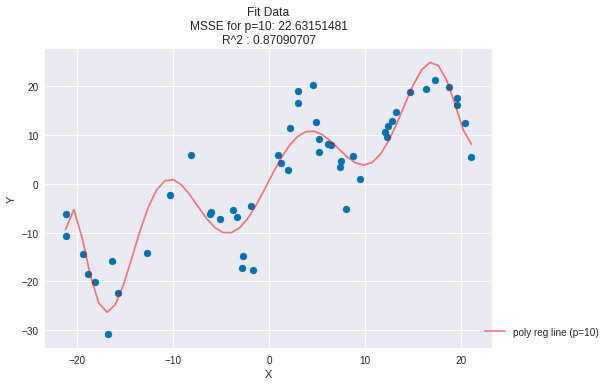

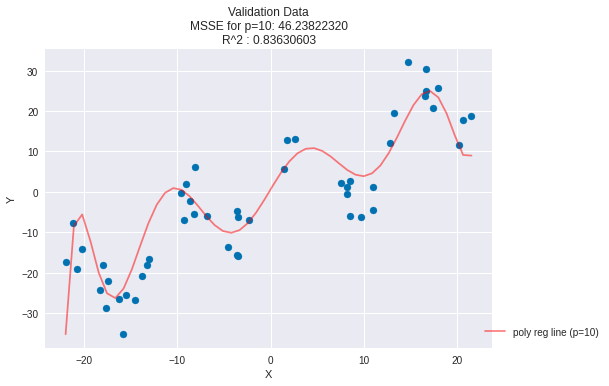




Plots for p = 11


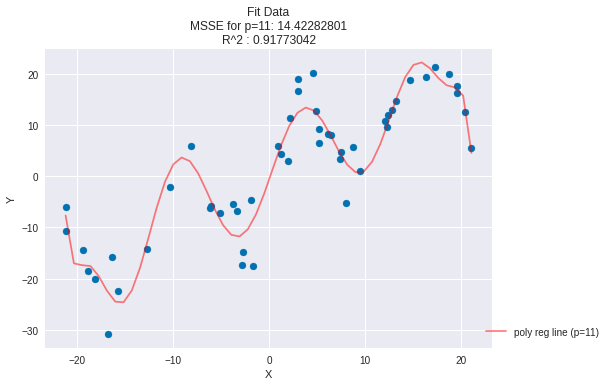

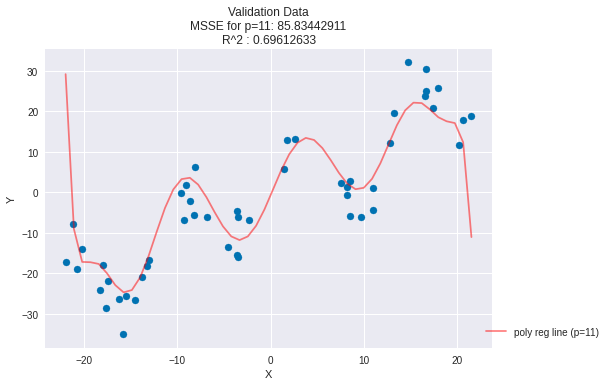




Plots for p = 12


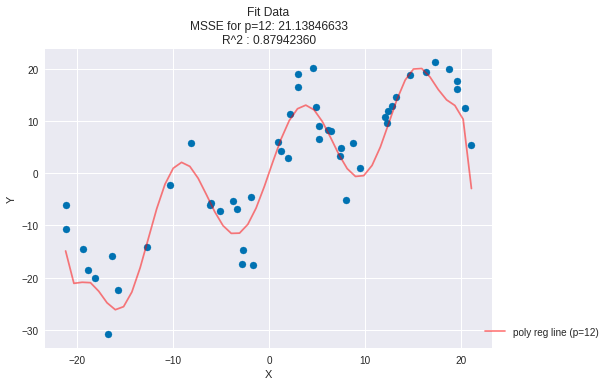

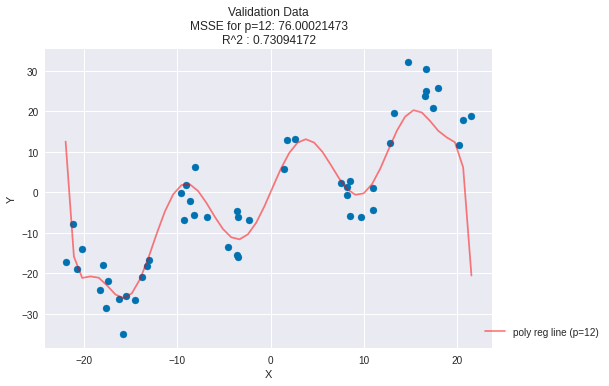




Plots for p = 13


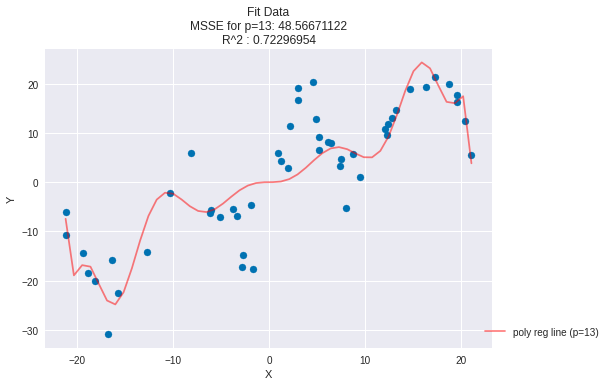

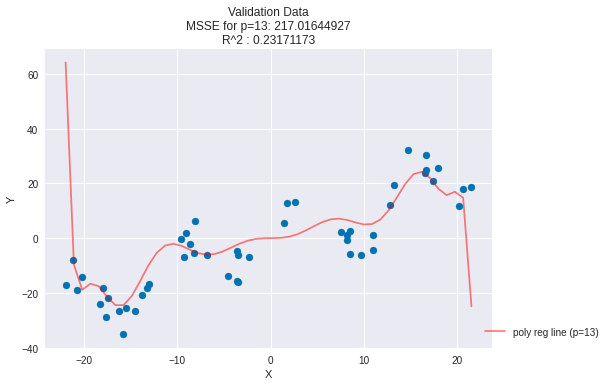




Plots for p = 14


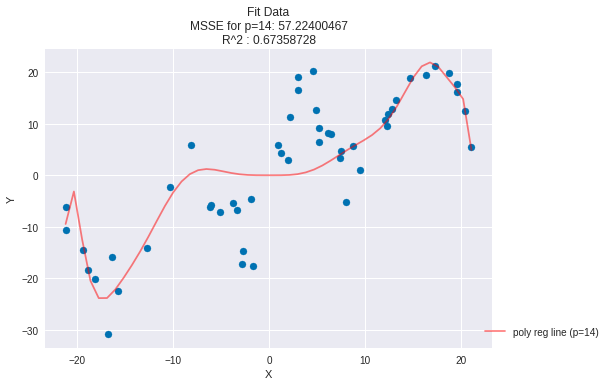

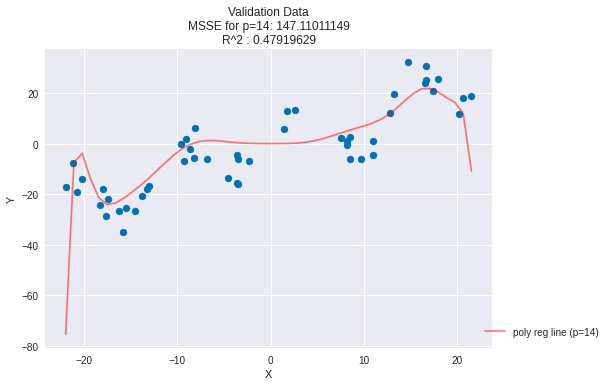




Plots for p = 15


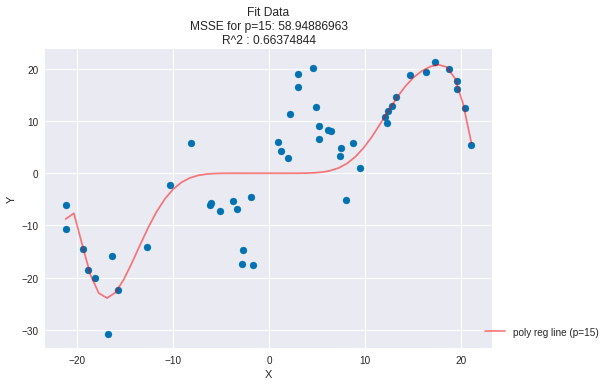

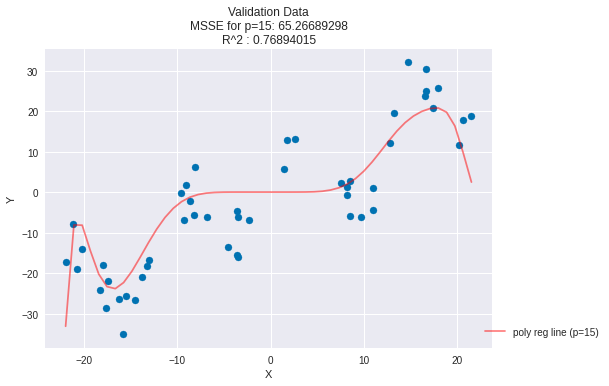




Plots for p = 16


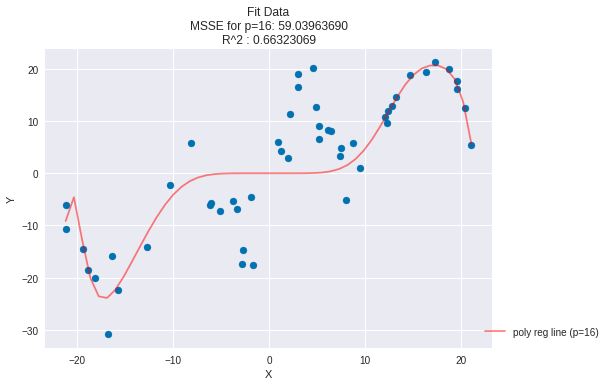

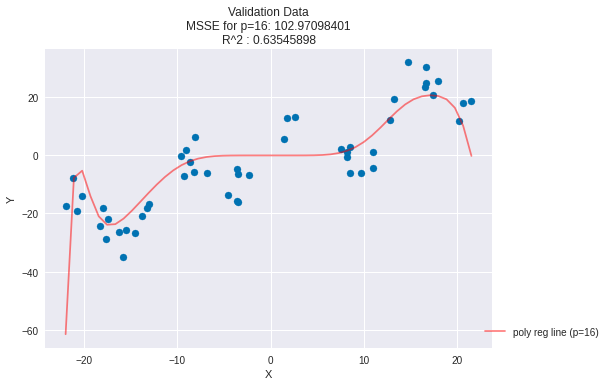




Plots for p = 17


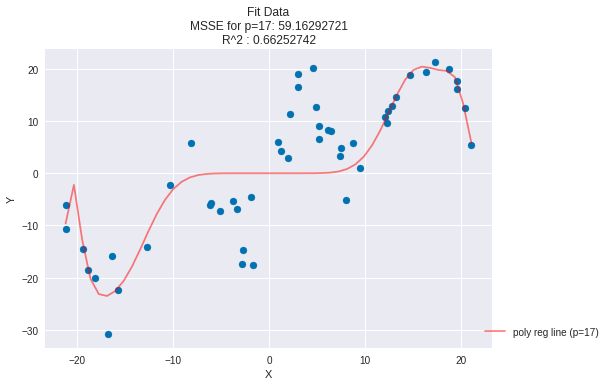

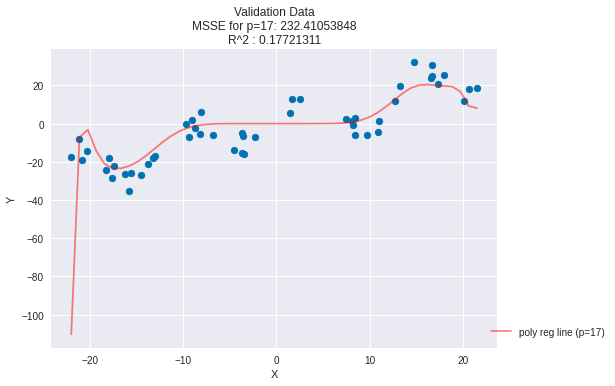




Plots for p = 18


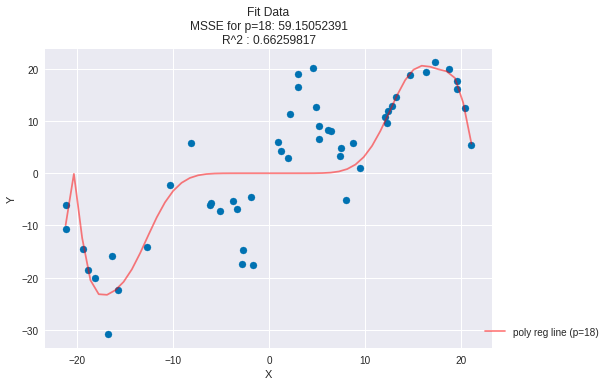

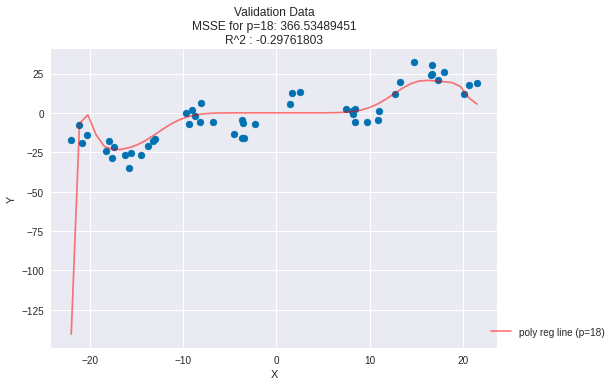




Plots for p = 19


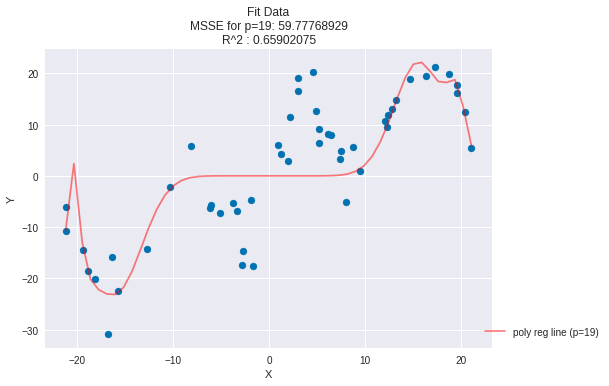

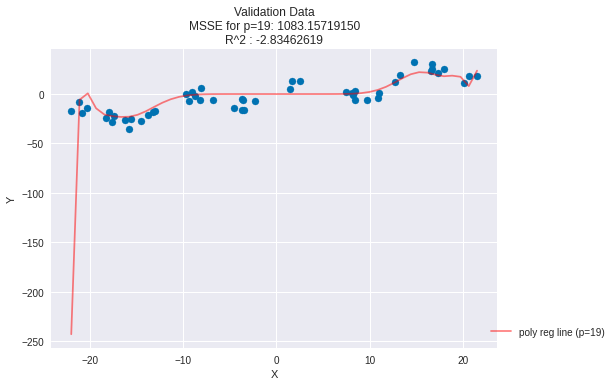




Plots for p = 20


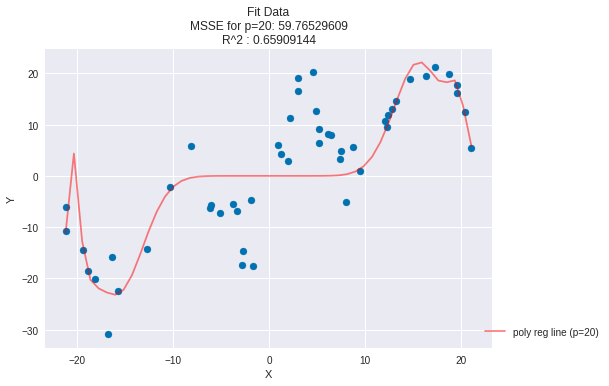

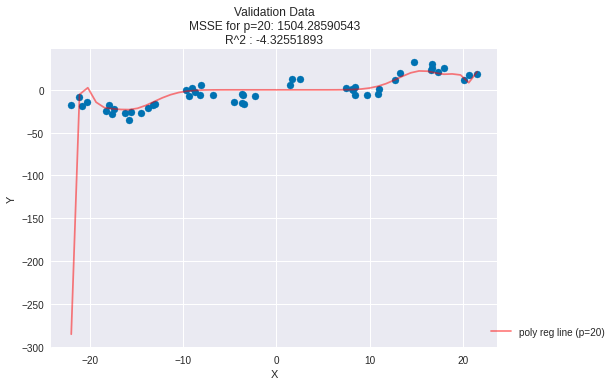

In [220]:
# dict to hold the p val of the regression as the key and its value holds a dict with the
# fit and validation r^2 and msse
poly_results_dict = {}
for i in range(11):
    poly= i+10
    print(f'\n\n\nPlots for p = {poly}')
    #dict to hold r2 and msse for fit and validation set
    fit_val_dict = {}
    
    poly_lin_reg_fit = linear_regression.LinearRegression(fit_set)
    poly_lin_reg_fit.linear_regression(['X'], 'Y', p = poly)

    fit_val_dict['fit'] = [poly_lin_reg_fit.R2 , poly_lin_reg_fit.m_sse]
    
    poly_lin_reg_fit.scatter('X','Y', title = f'Fit Data\nMSSE for p={poly}: {poly_lin_reg_fit.m_sse:.8f}')
    poly_lin_reg_fit.show()



    poly_lin_reg_val = linear_regression.LinearRegression(validation_set)
    fit_slopes =  poly_lin_reg_fit.get_fitted_slope()
    fit_intercept= poly_lin_reg_fit.get_fitted_intercept()
    poly_lin_reg_val.initialize(['X'], 'Y', p = poly, slope = fit_slopes,
                           intercept = fit_intercept)
    
    fit_val_dict['val'] = [poly_lin_reg_val.R2 , poly_lin_reg_val.m_sse]
    poly_results_dict[poly] = fit_val_dict
    
    poly_lin_reg_val.scatter('X','Y', title = f'Validation Data\nMSSE for p={poly}: {poly_lin_reg_val.m_sse:.8f}')
    poly_lin_reg_val.show()

In [86]:
for p_val, results_dict in poly_results_dict.items():
    print(f'\nFor p={p_val}:\n\tFit:  R2={results_dict["fit"][0]}  ,  MSSE={results_dict["fit"][1]}' + 
        f'\n\tValidation:  R2={results_dict["val"][0]}  ,  MSSE={results_dict["val"][1]}'+
         f'\n\n\tDifference Between Fit and Val: R2={results_dict["fit"][0] - results_dict["val"][0]} ' +
         f', MSSE={results_dict["fit"][1] - results_dict["val"][1]}')


For p=10:
	Fit:  R2=0.8709253961357127  ,  MSSE=22.631514807586996
	Validation:  R2=0.7635410455511351  ,  MSSE=46.2382231979494

	Difference Between Fit and Val: R2=0.10738435058457763 , MSSE=-23.606708390362407

For p=11:
	Fit:  R2=0.9211379301402859  ,  MSSE=14.422828010169116
	Validation:  R2=0.7596427767354049  ,  MSSE=85.83442911067918

	Difference Between Fit and Val: R2=0.16149515340488096 , MSSE=-71.41160110051007

For p=12:
	Fit:  R2=0.9503565387607668  ,  MSSE=21.1384663278915
	Validation:  R2=0.7111327259088144  ,  MSSE=76.00021472509792

	Difference Between Fit and Val: R2=0.23922381285195238 , MSSE=-54.86174839720642

For p=13:
	Fit:  R2=0.7315377678625059  ,  MSSE=48.56671121722184
	Validation:  R2=0.9957559584590361  ,  MSSE=217.0164492686723

	Difference Between Fit and Val: R2=-0.2642181905965302 , MSSE=-168.44973805145045

For p=14:
	Fit:  R2=0.6807888489867053  ,  MSSE=57.224004673885474
	Validation:  R2=0.989701434720311  ,  MSSE=147.11011149452142

	Difference Be

**Answer 10 Continued:**
When looking at p vals past 13 and up to 20 it is interesting how once the p val gets to 15 and above the
I would say this is because now the polynomial regression is picking up on every data point instead of the trend of the function
leading to more overfitting, and it is interesting how the R2 values start to go above 1 for the validation data (think that might be a bug am going to ask teacher)
I think the explanation for why the fit of the validation is so bad at p=15 and above while being the best for the validation data at
p=13 with a r2 value of 0.995 is because the function contains 6 curves iun the data meaning there so 7 lines ie and they are at different hights, so the second order derivetives also change and need to be accounted for leading to an
ideal polynomial value of p = 13. However I wouldnt say at p=15 it exactly overfits because the fit r2 value gets much worse as well (due to numerical instability)



## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1. Your own data

- Run linear regression on datasets that interest you. Identify your hypotheses about the association between variables and test them out. Make plots and report all relevant metrics fit.

### 2. Linear regression algorithm comparison

- Research and implement other the linear regression solver methods (e.g. normal equations).
- Run and compare how well they do on a dataset of your choice.
- Research and implement matrix condition number. Find a dataset with a poor matrix condition number and then compare the regression methods. Which does best and why?


Condition number is defined by relationship between the largest mag eigval and smallest weight val if it is big it is hard to do things numerically with the matrix such as inverse or back triangle

### 3. Confidence intervals or other kinds of error bars on linear regression plots

- Add the option to plot 95% confidence intervals on the linear regression predictions in your plot functions (e.g. `scatter`).

### 4. Overfitting

- Run polynomial regression on other datasets. What degree polynomial works well? When do you overfit?

### 5. Stepwise linear regression

- Implement the stepwise linear regression discussed in class where you add variables to the regression model one-by-one in a greedy fashion: each variable added out of the available ones not already entered in the regression should result in the largest increase in the adjusted $R^2$ value on the validation data.

The data that I wanted to look at for project 3 is to do with the use of the capital bike share system used in Washington DC over the years of 2011 to 2012. I got the main data set of these statistics along with other data such as weather data relating to the statics from https://www.kaggle.com/marklvl/bike-sharing-dataset

The Citing for this data set is :
@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
    }

The Files in the Kaggle download:
    - Readme.txt
	- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
	- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days
    

As stated in their readme.txt: 

"The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data." and that they "aggregated the data on two hourly and daily basis and then extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com."

To Start I am going to look at the daily basis of the data-set so there are initially less samples to work with before I go into deeper analyasis. Also this is because I am hypothisising that the time that bike sharing is used more dependant on the daily statistics rather than by hour because naturally there will be times that bike shariong is use much more (like during times people are commuting in the morning and late afternoon) and times that will obviously see less traffic such as in the middle of the night.


Here are the variables of each sample in the data-set (from the readme.txt of the dataset on kaggle):

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered



As I said I am going to look at the day basis data-set first but before I can do that I need to manipulate day.csv into a csv file that can be read into my Data object. To do this I am going to take out the dteday (date) variable since it is the only one that is not a numeric type of data. I am going to store these values in a list called date_to_instance which is a list that holds all the dates in the same index postion as each sample because each sample represents a single day in the day.csv data set. This will let me corespond each sample with the correct date later on. I am also going to at the data type of numeric for all the variable in the updated data set and write it into a file called updated_bikes_day.csv which will be use in the data object for the analysis/ linear regression.

In [87]:
#import CSV module to read in csv files so that we can add data types to the data and manipulate
# the dteday var to a utc time integer
import csv

date_to_instance = []

with open('data/bike-sharing-datasets/day.csv', 'r', newline = '') as day_csv:
    with open('data/updates_bikes_day.csv', 'w') as updated_day_csv:
        day_reader = csv.reader(day_csv, delimiter = ',')
        updated_day_writer = csv.writer(updated_day_csv, delimiter = ',')
        for row_num, row in enumerate(day_reader):
                
                #get rid of date 
                new_row = [row[0]] + row[2:]
                
                
                #write to new csv file
                updated_day_writer.writerow(new_row)
                
                #add data types and date to list
                if row_num == 0:
                    updated_day_writer.writerow(['numeric' for var in new_row])
                else:
                    date_to_instance.append(row[1])           

Now I am going to load the updated bike day csv file into a data object

In [88]:
day_bike_data = data.Data('data/updates_bikes_day.csv')
bike_headers = day_bike_data.get_headers()
print(bike_headers)

['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


Next I am going to categorize the data headers into categorical values and number data values (variables that are in the categorical value should be categorized as enum but my Data Object only takes in numerical objects and I want to be able to plot the categorical numeric data as well

In [89]:
numeric_headers = bike_headers[-7:]
categorical_headers = bike_headers[:8]

The first main question I am looking to answer is what are the variables that contribute to more people using the bike sharing program in Washington D.C.

To do this now I am going to make a linear regression object of day_bike_data and then I am going to look at a pair plot of all the all headers excecept for casual and registered variables for each sample because cnt represents the aggregate of both groups of riders and gives us an idea of the TOTAL use of the bike sharing program. (These categories will be looked at later on in the analysis) We are mainly focusing on the bottow row of plots which show the r2 value for each variables single linear regression on the dependant variable cnt (total number of people using the bike sharing system)

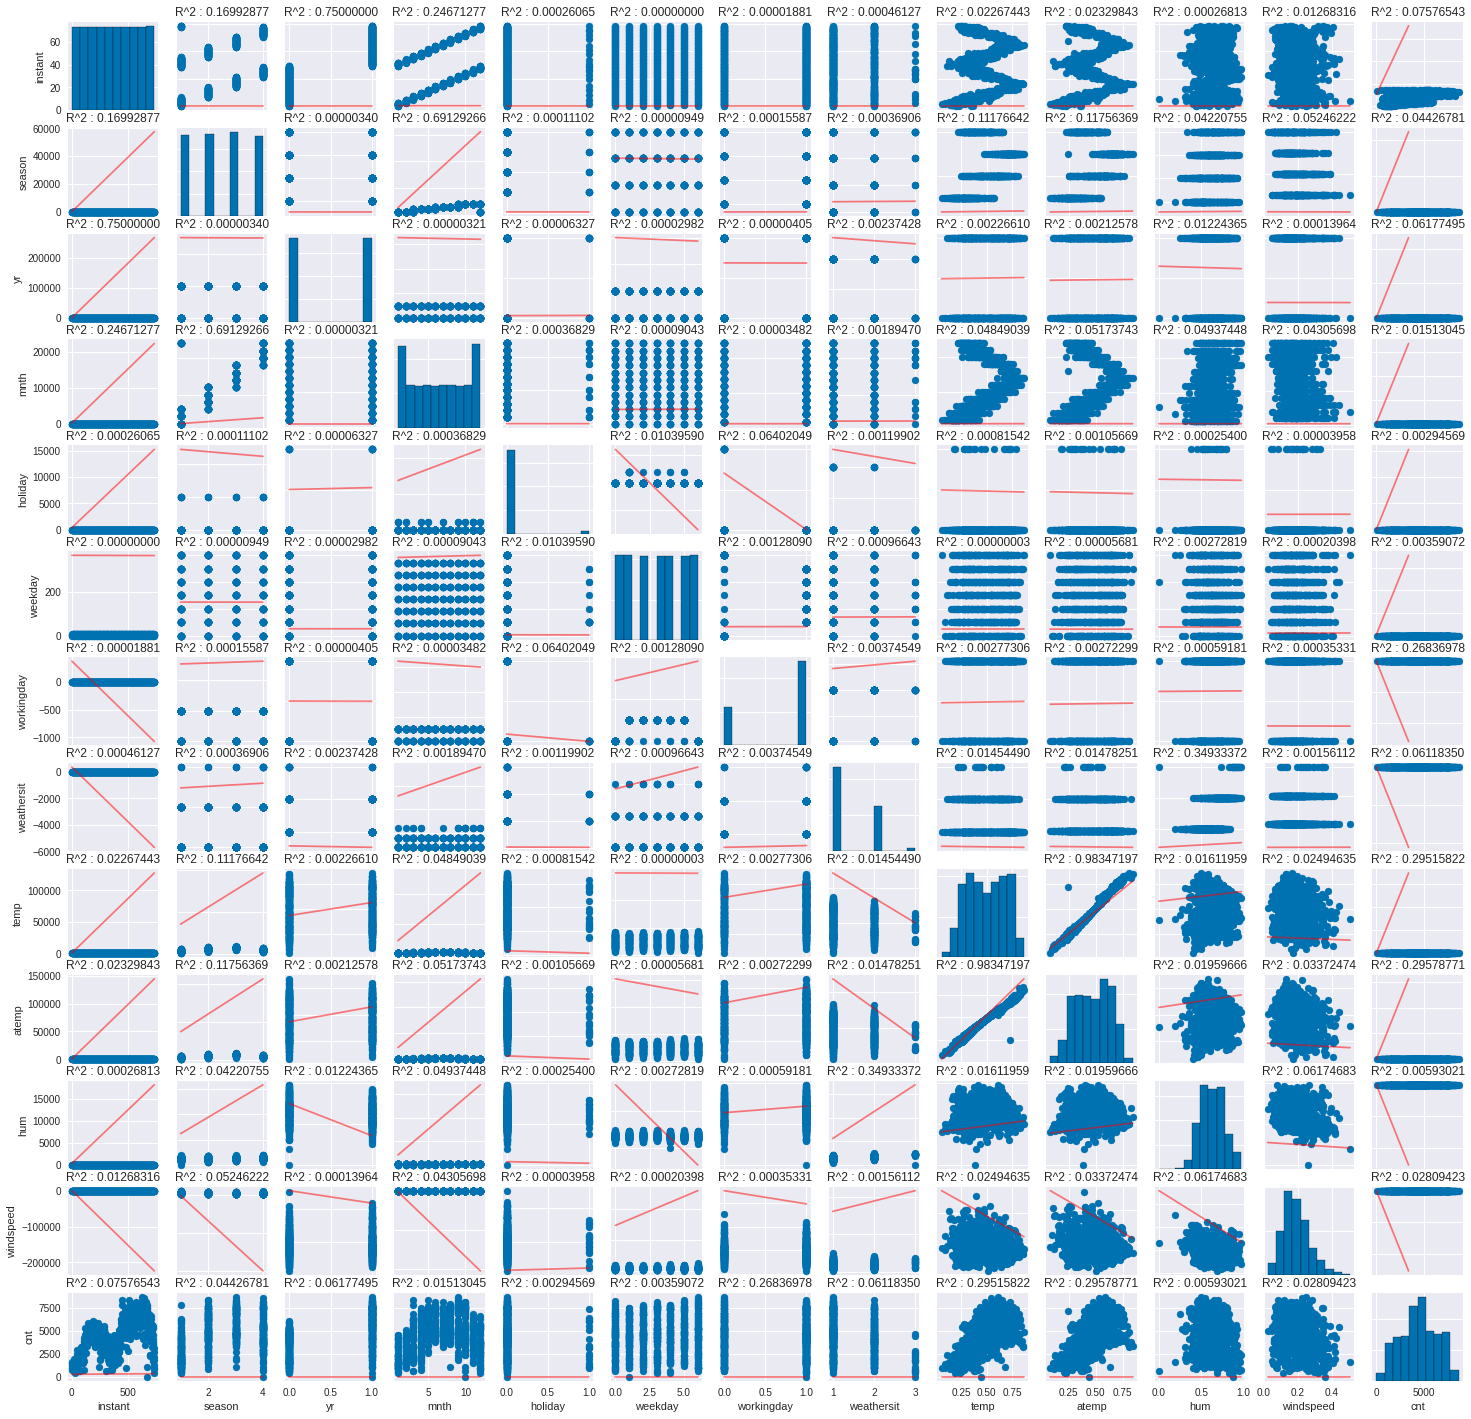

In [90]:
day_linear_reg = linear_regression.LinearRegression(day_bike_data)
day_linear_reg.pair_plot((categorical_headers+numeric_headers[:-3]+[numeric_headers[-1]]), fig_sz = (25,25))
day_linear_reg.show()

As You can see from this pair plot is is hard to understand the true effect of each variable because they are on different scales (all the numbers do not represent the same value) So to make this easier to analize first I am going to normalize the data seperatley. (will need to use the transformation object I created last project)

In [91]:
import transformation
import copy

normalized_day_bike_data = copy.copy(day_bike_data)
day_bike_transform = transformation.Transformation(normalized_day_bike_data)

normalized_day_bike_array = day_bike_transform.normalize_separately()
print(normalized_day_bike_data)
print(day_bike_data)


-------------------------------
data/updates_bikes_day.csv (731x15)
Headers:
	instant	season	yr	mnth	holiday	weekday	workingday	weathersit	temp	atemp	hum	windspeed	casual	registered	cnt
-------------------------------
 Showing first 5/731 rows.
 0.0	 0.0	 0.0	 0.0	 0.0	 1.0	 0.0	 0.5	0.355169596003472	0.37351737876240565	0.8286200514138817	0.28460620119145374	0.09653755868544601	0.09153912792376553	0.11079153244362633
0.0013698630136986301	 0.0	 0.0	 0.0	 0.0	 0.0	 0.0	 0.5	0.37923204997753385	0.36054066910781774	0.7157706940874036	0.46621455443766724	0.037852112676056336	0.09384926364423911	0.08962264150943397
0.0027397260273972603	 0.0	 0.0	 0.0	 0.0	0.16666666666666666	 1.0	 0.0	0.17099980237661438	0.14483010827663623	0.4496380462724936	0.46574039733952516	0.034624413145539906	0.17455963037828473	0.15266912103083297
0.004109589041095891	 0.0	 0.0	 0.0	 0.0	0.3333333333333333	 1.0	 0.0	0.17553043686730302	0.1746492376740948	0.6071311053984576	0.28429696830136103	0.031103286384976527

Now I am going to make a linear regression object with the normalized day bike data and try those pair plots again

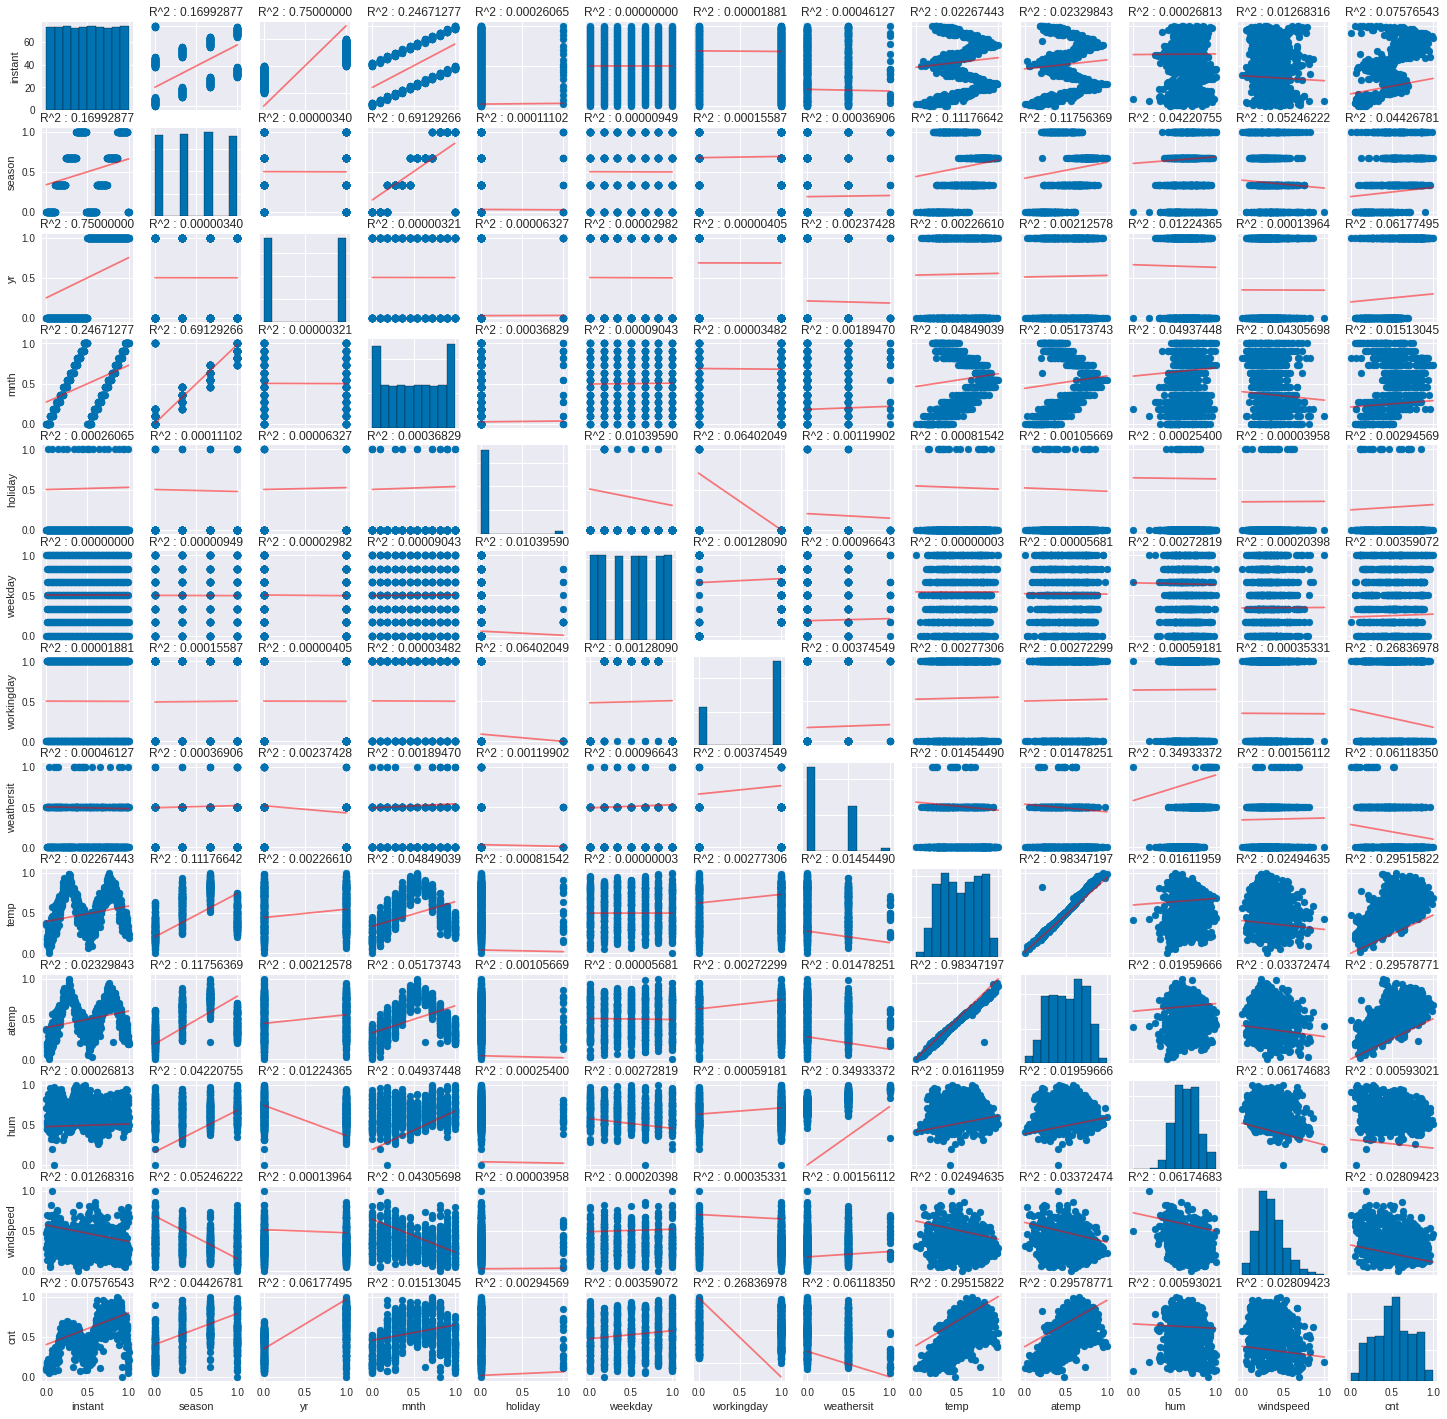

In [92]:
norm_day_linear_reg = linear_regression.LinearRegression(normalized_day_bike_data)
norm_day_linear_reg.pair_plot((categorical_headers+numeric_headers[:-3]+[numeric_headers[-1]]), fig_sz = (25,25))
norm_day_linear_reg.show()

With these Normalized pair plots it is much easier to makes some observations about the correlation of different variables with the total rider count. For starts we I can see that as time increased (this is the instant variable) so did the count of people using the bike sharing service which can be interpreted as more and more people are using the bike sharing service over time. (but why?) Next it makes sense that temp and atemp would both have reltivly high corelation with the number of people using the service with both of them being basicly the ssame but atemp a with a little higher correlation with an R2 of 0.29572771 and temp with an R2 of 0.29515822 (a difference of 0.0005694899999999503) is because atemp is the normalized  feeling temperature while temp is just the normalized temperature. Feeling temperature is how people that would use the bike sharing service would feel the climated is effected not only by the temperature but also wind speeds and the humitiy of that day as well.

This effect of temperature wind speed and humidity can be seen when doing the linear regression for the effect of temperature on the atemp versus the multiple linear regression of temp humidity and wind speed on the atemp.

In [93]:
norm_day_linear_reg.linear_regression(['temp'], 'atemp')
just_temp_r2 = norm_day_linear_reg.R2
norm_day_linear_reg.linear_regression(['temp','hum','windspeed'], 'atemp')
others_r2 = norm_day_linear_reg.R2
print(f'The R2 value with just temp is {others_r2}\nThe R2 value with temp, humidity, and windspeed is {just_temp_r2}' +
     f'\nSo adding humidity and wind speed imporoved R2 by {others_r2-just_temp_r2}\n'+
      f'Showing that they are also variables to the relitive feeling temperature.')

The R2 value with just temp is 0.9842847234372782
The R2 value with temp, humidity, and windspeed is 0.9834719706777316
So adding humidity and wind speed imporoved R2 by 0.00081275275954662
Showing that they are also variables to the relitive feeling temperature.


From a few of these observations I can definitely get rid of some variables (such as many doing with weather and time since they are all related) but first I wanted to run a multi-varible linear regression of the effects of all the variables together on the total count of riders (minus the categories of riders left out as mentioned before)

In [94]:
norm_day_linear_reg.linear_regression(bike_headers[:-2], 'cnt')
print(f'The R2 for the multi-variable linear regression of all the other variables on rider count is {norm_day_linear_reg.R2}')

The R2 for the multi-variable linear regression of all the other variables on rider count is 0.8923983577566037


The linear regression seems pretty good with a relatively high R2 of around 0.89 but to really test the linear regression I am going to split the data into a random train and test set of variables and do the regression on the train set of samples and test the regression on the test set.

To do this I wrote this function below that will split the data from the data set into a test and train set.
This function takes in the data object along with optional value for how big the train set percentage should be of the entire samples of the test and train data objects.

(It by defaults splits the data 50/50 between test and train data)

In [95]:
def make_train_test(data, train_percentage = 0.50, random_seed = 360):
    
    np.random.seed(random_seed)
    data_matrix = data.get_all_data()
    num_samps = data_matrix.shape[0]
    
    train_num = round(num_samps * train_percentage)
    
    #make data samples in random order
    np.random.shuffle(data_matrix)
    
    train_data_matrix = data_matrix[:train_num]
    test_data_matrix = data_matrix[train_num:]
    
    test_data = copy.copy(data)
    train_data = copy.copy(data)
    
    test_data.data = test_data_matrix
    train_data.data = train_data_matrix
    return train_data, test_data

In [96]:
train_day_bike_data, test_day_bike_data = make_train_test(normalized_day_bike_data)
print(f'Training Data:{train_day_bike_data}\n\n\nTest Data:{test_day_bike_data}')

Training Data:
-------------------------------
data/updates_bikes_day.csv (366x15)
Headers:
	instant	season	yr	mnth	holiday	weekday	workingday	weathersit	temp	atemp	hum	windspeed	casual	registered	cnt
-------------------------------
 Showing first 5/366 rows.
0.021917808219178082	 0.0	 0.0	 0.0	 1.0	0.16666666666666666	 0.0	 0.5	0.1454171685129376	0.1282462776296542	0.5526992287917737	0.3538145835467899	0.03374413145539906	0.1246029454230436	0.11251725724804418
0.7794520547945205	0.6666666666666666	 1.0	0.5454545454545454	 0.0	0.16666666666666666	 1.0	 0.0	0.8504741092181963	0.8019509431545034	0.7137964010282776	0.2397406319442111	0.3324530516431925	0.8390124169794976	0.7988955361251726
0.5191780821917809	 0.0	 1.0	 0.0	 0.0	 0.0	 0.0	 0.0	0.13399588255538752	0.10836510785134248	0.4310200514138817	0.47181991595874667	0.08274647887323944	0.2897776494369044	0.2633456051541648
0.3356164383561644	0.6666666666666666	 0.0	0.7272727272727273	 0.0	 1.0	 0.0	 0.0	0.76013555020419	0.727388024358

Now I am going to run the multiple linear regression on the train data set and test it on the test day bike normalized data set to see how the regression model does at predicting the number of people using the bike share service that day.

In [97]:
norm_day_linear_reg_train = linear_regression.LinearRegression(train_day_bike_data)
norm_day_linear_reg_train.linear_regression(bike_headers[:-3], 'cnt')




norm_day_linear_reg_test = linear_regression.LinearRegression(test_day_bike_data)

fit_slopes =  norm_day_linear_reg_train.get_fitted_slope()
fit_intercept= norm_day_linear_reg_train.get_fitted_intercept()

norm_day_linear_reg_test.initialize(bike_headers[:-3], 'cnt',slope = fit_slopes,
                       intercept = fit_intercept)
print(f'Train: R2 = {norm_day_linear_reg_train.R2} , MSSE = {norm_day_linear_reg_train.m_sse}\n'+
     f'Test: R2 = {norm_day_linear_reg_test.R2} , MSSE = {norm_day_linear_reg_test.m_sse}\n')

Train: R2 = 0.8209427621924639 , MSSE = 0.00942152321518272
Test: R2 = 0.8004857047812877 , MSSE = 0.011209359966047206



Now I am going to try it with 70 percent of the data being used in the train set

In [98]:
train_day_bike_data, test_day_bike_data = make_train_test(normalized_day_bike_data, 0.7)
norm_day_linear_reg_train = linear_regression.LinearRegression(train_day_bike_data)
norm_day_linear_reg_train.linear_regression(bike_headers[:-3], 'cnt')

norm_day_linear_reg_test = linear_regression.LinearRegression(test_day_bike_data)

fit_slopes =  norm_day_linear_reg_train.get_fitted_slope()
fit_intercept= norm_day_linear_reg_train.get_fitted_intercept()

norm_day_linear_reg_test.initialize(bike_headers[:-3], 'cnt',slope = fit_slopes,
                       intercept = fit_intercept)
print(f'Train: R2 = {norm_day_linear_reg_train.R2} , MSSE = {norm_day_linear_reg_train.m_sse}\n'+
     f'Test: R2 = {norm_day_linear_reg_test.R2} , MSSE = {norm_day_linear_reg_test.m_sse}\n')

Train: R2 = 0.8027743418201708 , MSSE = 0.01002630084757875
Test: R2 = 0.8818007143905174 , MSSE = 0.01024284947422149



For this data set it appears that this multi variable linear regression preforms better when 70% of the data is used for the training data set as compared to when 50% is used with the R2 for the test data imporoving from around 0.80 to around 0.88 how ever this is not always the case and it depended alot on the random seed that numpy uses. I would say that this can be explained to a relitivly low number of samples in the data set.


To further improve the linear regression done on this model I wanted to use a step-wise linear equation algorithim but before I implement that algorithim; since it requires linear regression to be calculated ( FIND TIME COMPLEXITY) a large ammount of times I wanted to makes sure than I am using the best linear regression algorithim possible (especially when it comes to multi-variable linear regression). So Next I implemented linear regression through normal equations and linear regression through QR decompisition. To chose which linear regression method is being preformed I created a parameter named "method" for the linear_regression function that preforms the correct method of linear regression based off of the method provided: 

('scipy' for using scipy, 'normal' for the normal equations method and 'qr' for the QR decompisition method) 

Below I am going to run each of the linear regression methods for a multi-variable linear regression done on all samples in the nomalized day bike data set and time them using %timeit to see which one method faster as well as comparing their R2s and MSSEs.  

In [99]:
# Scipy Method
lin_reg_day_bike = linear_regression.LinearRegression(normalized_day_bike_data)
print(f'The time it took for Scipy method is:')
%timeit lin_reg_day_bike.linear_regression(bike_headers[:-3], 'cnt', 'scipy')
print(f'\nThe MSSE for Scipy method is {lin_reg_day_bike.m_sse}'+
     f'\nThe R2 for Scipy method is {lin_reg_day_bike.R2}')


# Normal Method
lin_reg_day_bike = linear_regression.LinearRegression(normalized_day_bike_data)
print(f'\n\nThe time it took for Normal method is:')
%timeit lin_reg_day_bike.linear_regression(bike_headers[:-3], 'cnt', 'normal')
print(f'\nThe MSSE for Normal method is {lin_reg_day_bike.m_sse}'+
     f'\nThe R2 for Normal method is {lin_reg_day_bike.R2}')

# QR Method
lin_reg_day_bike = linear_regression.LinearRegression(normalized_day_bike_data)
print(f'\n\nThe time it took for QR method is:')
%timeit lin_reg_day_bike.linear_regression(bike_headers[:-3], 'cnt', 'qr')
print(f'\nThe MSSE for QR method is {lin_reg_day_bike.m_sse}'+
     f'\nThe R2 for QR method is {lin_reg_day_bike.R2}')

The time it took for Scipy method is:
328 µs ± 722 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)

The MSSE for Scipy method is 0.009842991471202881
The R2 for Scipy method is 0.8015701493093209


The time it took for Normal method is:
241 µs ± 1.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

The MSSE for Normal method is 0.009842991471202881
The R2 for Normal method is 0.8015701493086318


The time it took for QR method is:
725 µs ± 819 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)

The MSSE for QR method is 0.009842991471202881
The R2 for QR method is 0.8015701493093199


From here I can see that all the methods lead to the same R2 and MSSE value for the multi-variable linear regression (in the case of this data set) but that the normal regression method is the quickest averaging around 409 microseconds +- 2,65 microseconds compared to the slowest method which was with QR decompisition taking on average 1.47 miliseconds. This suprised me because I would have thought it would have been the other way around because with the QR decompostion method computing the inverse of a matrix is not needed and I thought that computing the inverse of a matrix was very computationaly intensive. 


Because normal method is the quickest I will make this the default linear regression model used in the step-wise linear regression function. (however it will be able to be change by a paramater for the function called 'method')


I also made it so that the step-wise linear regression can track R2 or adjusted R2 (where it cuts off if adjusted r2 goes negetive)
using the input argument use_adjusted_r2

$adjusted R^2 = 1 - [(1-R^2)(N-1)/(N-K-1)]$

In [100]:
def step_wise_linear_regression(dataObj, ind_vars = None,dep_var = None, method = 'normal', 
                               R2_list = [], R2_adjusted_list = [], ind_vars_used_ordered = [], use_adjusted_r2 = True):
    
    # could just pass in the linear regression object would be more efficiet
    # but am making a new one for each recursion (run) of this function instead
    lin_reg = linear_regression.LinearRegression(dataObj)
    
    if isinstance(ind_vars, type(None)) or isinstance(dep_var, type(None)):
        print(f'Error: there must be atleast 1 ind_var and dep_var\nRight now they are {ind_vars} and  {dep_var}')

    
    #if there are not ind_vars left return the R2_list, R2_adjusted_list, and ind_vars_used_ordered
    if len(ind_vars) < 1:
        return R2_list, R2_adjusted_list, ind_vars_used_ordered
    
        
    ind_vars_array = np.array(ind_vars)
    headers_array = np.array(dataObj.get_headers())

    if dep_var not in headers_array:
        print(f'Error: dep_var: {dep_var} needs to be in {headers_array}')

    for ind_var in ind_vars_array:
        if ind_var not in headers_array:
            print(f'Error: ind_var: {ind_var} needs to be in {headers_array}')

    
    # make max r2 val holder
    max_R2_var = ('holder', float('-inf'))

    # make max adjusted r2 val holder
    max_adj_R2_var = ('holder', float('-inf'))
    
    for ind_var in ind_vars:
        # run linear regression bassed off of the method chosen
        if method == 'scipy':
            lin_reg.linear_regression([ind_var] + ind_vars_used_ordered, dep_var, 'scipy')
        elif method == 'normal':
            lin_reg.linear_regression([ind_var]+ ind_vars_used_ordered, dep_var, 'normal')
        elif method == 'qr':
            lin_reg.linear_regression([ind_var]+ ind_vars_used_ordered, dep_var, 'qr')

        current_r2 = lin_reg.R2
        #see if R2 is greater
        if current_r2 > max_R2_var[1]:
            max_R2_var = (ind_var, current_r2)

        #calculate adjusted R2
        n = lin_reg.data.get_num_dims()#number of features
        k = len(ind_vars_used_ordered) #number of vars added to the model
        adj_R2 = 1 - ((1-current_r2)*(n-1)/(n-k-1))

        #see if adj R2 is greater
        if adj_R2 > max_adj_R2_var[1]:
            max_adj_R2_var = (ind_var,adj_R2)


    #see if use adj r2
    if use_adjusted_r2:
        if max_adj_R2_var[1] < 0:
             return R2_list, R2_adjusted_list, ind_vars_used_ordered

    #set values
    ind_vars.remove(max_R2_var[0])
    if use_adjusted_r2:
        ind_vars_used_ordered.append(max_adj_R2_var[0])
    else:
        ind_vars_used_ordered.append(max_R2_var[0])
    R2_list.append(max_R2_var)
    R2_adjusted_list.append(max_adj_R2_var)
    step_wise_linear_regression(dataObj,ind_vars,dep_var, method, 
                               R2_list, R2_adjusted_list, ind_vars_used_ordered,use_adjusted_r2)

    #return from recursion
    return R2_list, R2_adjusted_list, ind_vars_used_ordered


Now I am going to plot the r2 and adjusted r2 for the step-wise linear regression of the bike data

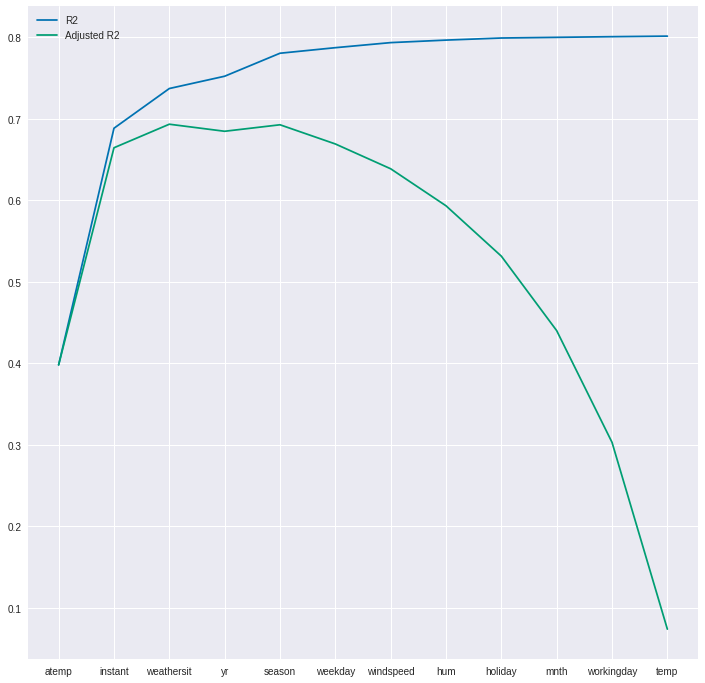

In [101]:
bike_r2_list, bike_adj_r2_list,bike_ind_vars_used_ordered = step_wise_linear_regression(normalized_day_bike_data, bike_headers[:-3], 'cnt')
#%
bike_r2_vals = [x[1] for x in bike_r2_list]
bike_adj_r2_vals = [x[1] for x in bike_adj_r2_list]

fig, axes = plt.subplots(figsize = (12,12))
axes.plot(bike_ind_vars_used_ordered,bike_r2_vals,label = 'R2')
axes.plot(bike_ind_vars_used_ordered,bike_adj_r2_vals,label = 'Adjusted R2')
axes.legend()
plt.show()

It was this point in trying to figure out how to get a better prediction model I realized I made a lot of mistakes in my initial approach
for analyzing this data. First of all, linear regression by name can only capture linear relationships so to get a better prediction model I will need to
choose my data better and maybe look at some polynomial regression for some of the independent variables.
Also I realized ordered categorical variables work best in regression models and not the best when the categories have no hiearchy


TO start this I am going to do polynomial regression with just one ind var at a time using the regression class i created
to get an idea for the correct p val to use for each independent variable. Also before I start I am going to write a function
that plots and prints out the MSSE and r2 vals of different p val poly regressions for a range of p vals on a train and test
data set.

/home/matt3080/PycharmProjects/cs251/project3/linear_regression.py:211: RuntimeWarning: divide by zero encountered in double_scalars
  self.adj_R2 = 1 - ((1 - self.R2) * (n - 1) / (n - k - 1))


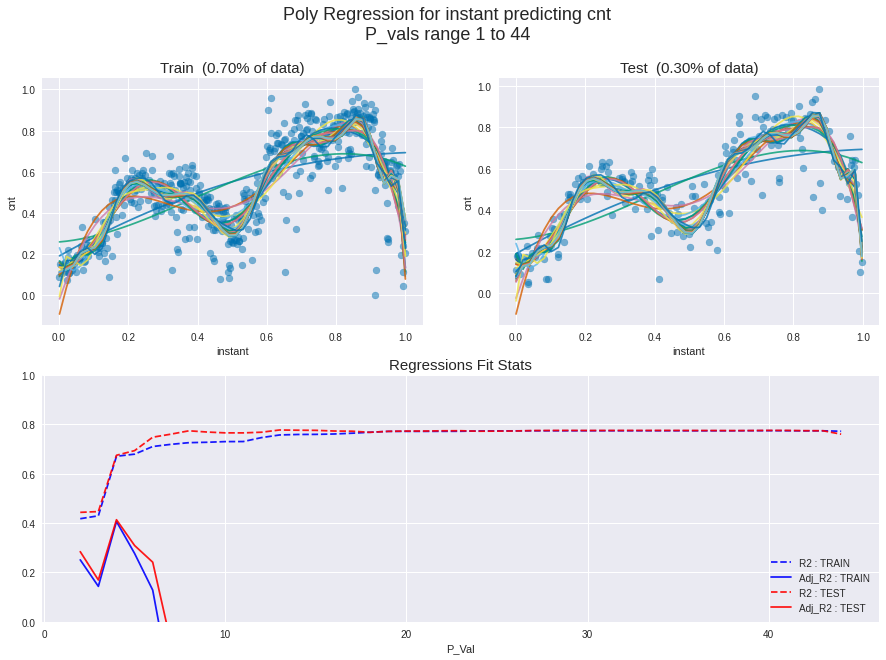

In [214]:

def explore_p_val_regressions(dataObj, ind_var,dep_var,p_val_min = 1,p_val_max = 2,show_graphs = True,
                              show_fit_vals = True,train_percentage = 0.50, random_seed = 360):

    # Initilize the train and test data
    train_data, test_data = make_train_test(dataObj,train_percentage=train_percentage,random_seed=random_seed)

    # Initilize dict to hold p val as key and its values are a list of the regressions for the train and test
    # data of each p val
    poly_regres_dict = {}

    fig = plt.figure(figsize = (15,10))

    #help layout
    fig.tight_layout(pad=5.0)

    fig.suptitle(f'Poly Regression for {ind_var} predicting {dep_var}\nP_vals range {p_val_min} to {p_val_max}'
                     , size=18)

    #set references for train plot and test plots
    # also make bottom graph
    train_graph = fig.add_subplot(2,2,1)
    test_graph = fig.add_subplot(2,2,2)

    bottom_stat_graph = fig.add_subplot(2,1,2)


    #set titles
    train_graph.set_title(f'Train  ({train_percentage:.2f}% of data)',size = 15)
    test_graph.set_title(f'Test  ({1 - train_percentage:.2f}% of data)',size = 15)
    bottom_stat_graph.set_title(f'Regressions Fit Stats',size = 15)

    #set axis labels for graph
    train_graph.set_xlabel(ind_var)
    test_graph.set_xlabel(ind_var)
    train_graph.set_ylabel(dep_var)
    test_graph.set_ylabel(dep_var)

    bottom_stat_graph.set_xlabel(f'P_Val')

    #graph the train and test data
    train_graph.scatter(train_data.select_data([ind_var]),train_data.select_data([dep_var]), alpha=0.5)
    test_graph.scatter(test_data.select_data([ind_var]),test_data.select_data([dep_var]), alpha=0.5)


    #initialize lists to hold stat values for bottom stats graph.
    p_vals_list = []

    train_R2_list = []
    train_adj_R2_list = []

    test_R2_list = []
    test_adj_R2_list = []


    # Loop through range of p vals
    for poly_val in range(p_val_min,p_val_max):
        p_val = poly_val + 1

        #Train Data
        poly_reg_train = linear_regression.LinearRegression(train_data)
        poly_reg_train.linear_regression([ind_var], dep_var,p= p_val)


        #Test DAta
        poly_reg_test = linear_regression.LinearRegression(test_data)

        fit_slopes =  poly_reg_train.get_fitted_slope()
        fit_intercept= poly_reg_train.get_fitted_intercept()

        poly_reg_test.initialize([ind_var], dep_var,slope = fit_slopes,
                       intercept = fit_intercept, p = p_val)


        #get cords for regression line and plot it
        poly_reg_train_cords = poly_reg_train.get_regression_cords(ind_var,dep_var)
        poly_reg_test_cords = poly_reg_test.get_regression_cords(ind_var,dep_var)

        train_graph.plot(poly_reg_train_cords[0], poly_reg_train_cords[1],
                         label=f'{p_val} , {poly_reg_train.m_sse:.3f}', alpha=0.8)
        test_graph.plot(poly_reg_test_cords[0], poly_reg_test_cords[1],
                        label=f'{p_val} , {poly_reg_test.m_sse:.3f}', alpha=0.8)

        # Add p val and regressions to dict
        poly_regres_dict[p_val] = [poly_reg_train,poly_reg_test]

        # Add stats to the different stats lists for the bottom graph
        p_vals_list.append(p_val)

        train_R2_list.append(poly_reg_train.R2)
        train_adj_R2_list.append(poly_reg_train.get_adj_R2())


        test_R2_list.append(poly_reg_test.R2)
        test_adj_R2_list.append(poly_reg_test.get_adj_R2())



    #set legends
    # train_graph.legend(title = f'Color ,  P  , MSSE ',title_fontsize = 9,fontsize = 9)
    # test_graph.legend(title = f'Color ,  P  , MSSE ',title_fontsize = 9,fontsize = 9)


    #make the bottom stats graph
        #train reg stat vals
    bottom_stat_graph.plot(p_vals_list,train_R2_list,c = 'b', linestyle = 'dashed',
                           label = f'R2 : TRAIN', alpha = 0.9)
    bottom_stat_graph.plot(p_vals_list,train_adj_R2_list,c = 'b', linestyle = 'solid',
                           label = f'Adj_R2 : TRAIN', alpha = 0.9)


        #test reg stat vals
    bottom_stat_graph.plot(p_vals_list,test_R2_list,c = 'r', linestyle = 'dashed',
                           label = f'R2 : TEST', alpha = 0.9)
    bottom_stat_graph.plot(p_vals_list,test_adj_R2_list,c = 'r', linestyle = 'solid',
                           label = f'Adj_R2 : TEST', alpha = 0.9)


        #set y axis lims
    bottom_stat_graph.set_ylim((0,1))
        #make legend
    bottom_stat_graph.legend()




    #show the plot and end of function
    plt.show()

    return (poly_regres_dict,[train_R2_list,train_adj_R2_list],[test_R2_list,test_adj_R2_list])
#test function
aaa1 = explore_p_val_regressions(dataObj= normalized_day_bike_data,ind_var='instant', dep_var='cnt', p_val_min= 1, p_val_max= 44,train_percentage=0.7)

/home/matt3080/PycharmProjects/cs251/project3/linear_regression.py:211: RuntimeWarning: divide by zero encountered in double_scalars
  self.adj_R2 = 1 - ((1 - self.R2) * (n - 1) / (n - k - 1))


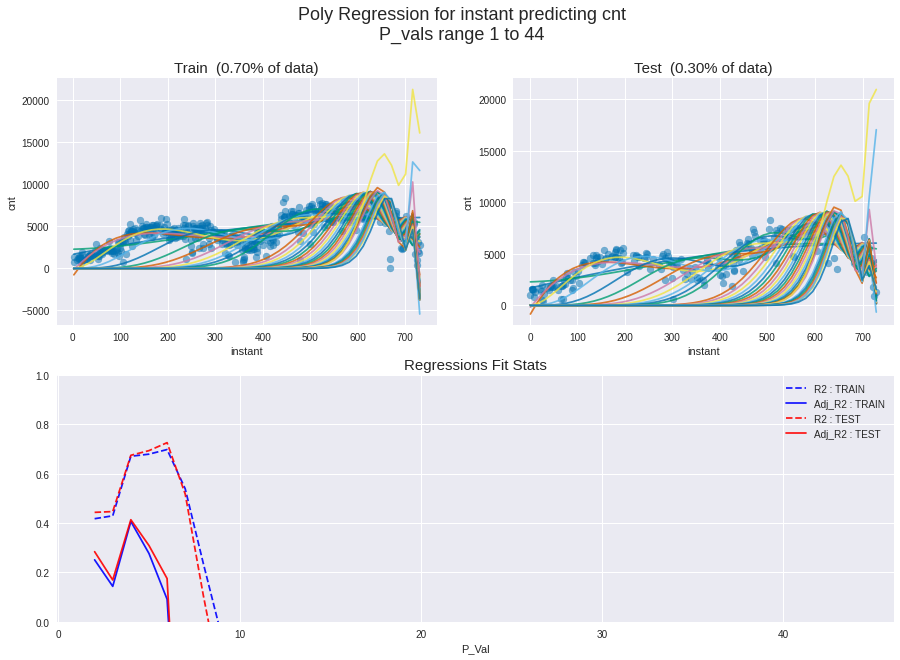

In [215]:
#test function
aaaa2 = explore_p_val_regressions(dataObj= day_bike_data,ind_var='instant', dep_var='cnt', p_val_min= 1, p_val_max= 44,train_percentage=0.7)

I made at first but
because of the way the linear_regression class is made for this project it does not allow for multi variablie and
polynomial regression to be preformed at once so instead I am going to use pandas and scikitlearn to make this final regression model



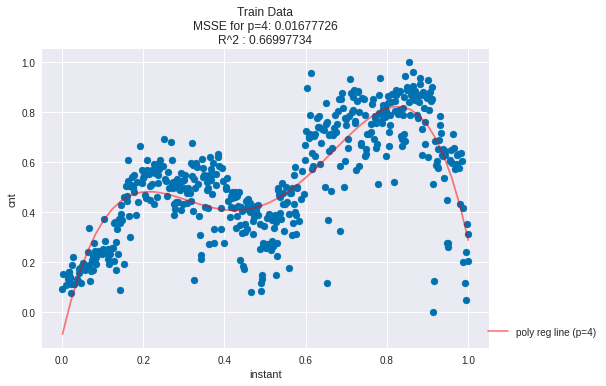

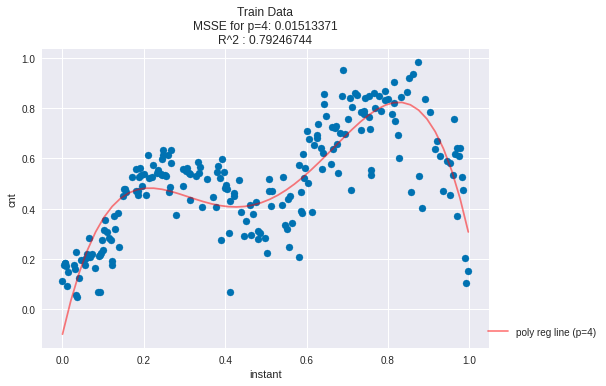

Train: R2 = 0.6699773405296496 , MSSE = 0.016777261644886243
Test: R2 = 0.7924674419487913 , MSSE = 0.015133714902312443



In [30]:
#set variable to hold p val named poly_val
poly_val = 4
#Train
norm_day_linear_reg_train = linear_regression.LinearRegression(train_day_bike_data)
norm_day_linear_reg_train.linear_regression(['instant'], 'cnt',p= poly_val)

norm_day_linear_reg_train.scatter('instant','cnt', title = f'Train Data\nMSSE for p={poly_val}: {norm_day_linear_reg_train.m_sse:.8f}')
norm_day_linear_reg_train.show()

#Test
norm_day_linear_reg_test = linear_regression.LinearRegression(test_day_bike_data)

fit_slopes =  norm_day_linear_reg_train.get_fitted_slope()
fit_intercept= norm_day_linear_reg_train.get_fitted_intercept()

norm_day_linear_reg_test.initialize(['instant'], 'cnt',slope = fit_slopes,
                       intercept = fit_intercept, p = poly_val)

norm_day_linear_reg_test.scatter('instant','cnt', title = f'Train Data\nMSSE for p={poly_val}: {norm_day_linear_reg_test.m_sse:.8f}')
norm_day_linear_reg_test.show()

#print results
print(f'Train: R2 = {norm_day_linear_reg_train.R2} , MSSE = {norm_day_linear_reg_train.m_sse}\n'+
     f'Test: R2 = {norm_day_linear_reg_test.R2} , MSSE = {norm_day_linear_reg_test.m_sse}\n')

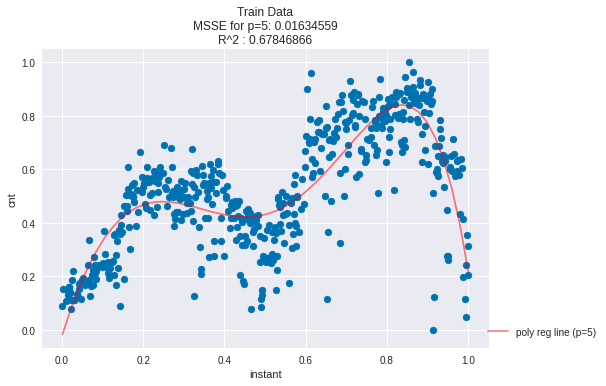

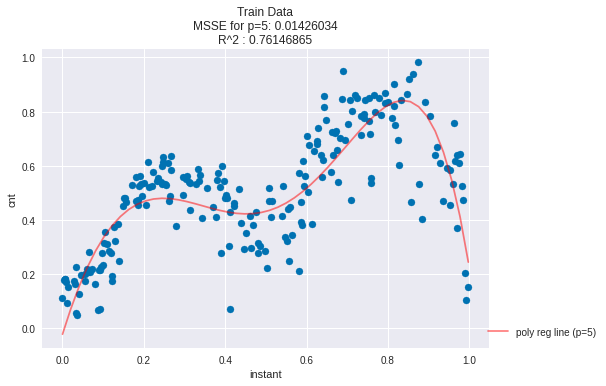

Train: R2 = 0.6784686620185822 , MSSE = 0.01634559091488396
Test: R2 = 0.7614686533121797 , MSSE = 0.014260340571089656



In [31]:
#set variable to hold p val named poly_val
poly_val = 5
#Train
norm_day_linear_reg_train = linear_regression.LinearRegression(train_day_bike_data)
norm_day_linear_reg_train.linear_regression(['instant'], 'cnt',p= poly_val)

norm_day_linear_reg_train.scatter('instant','cnt', title = f'Train Data\nMSSE for p={poly_val}: {norm_day_linear_reg_train.m_sse:.8f}')
norm_day_linear_reg_train.show()

#Test
norm_day_linear_reg_test = linear_regression.LinearRegression(test_day_bike_data)

fit_slopes =  norm_day_linear_reg_train.get_fitted_slope()
fit_intercept= norm_day_linear_reg_train.get_fitted_intercept()

norm_day_linear_reg_test.initialize(['instant'], 'cnt',slope = fit_slopes,
                       intercept = fit_intercept, p = poly_val)

norm_day_linear_reg_test.scatter('instant','cnt', title = f'Train Data\nMSSE for p={poly_val}: {norm_day_linear_reg_test.m_sse:.8f}')
norm_day_linear_reg_test.show()

#print results
print(f'Train: R2 = {norm_day_linear_reg_train.R2} , MSSE = {norm_day_linear_reg_train.m_sse}\n'+
     f'Test: R2 = {norm_day_linear_reg_test.R2} , MSSE = {norm_day_linear_reg_test.m_sse}\n')

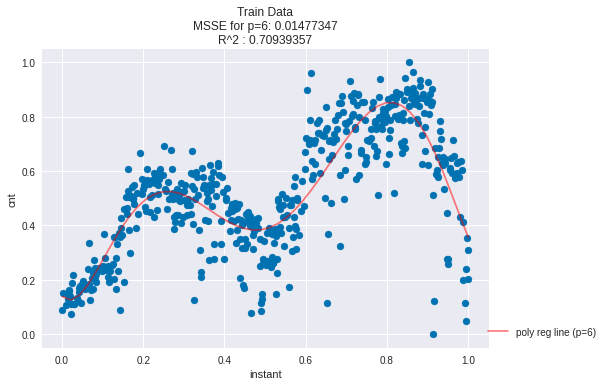

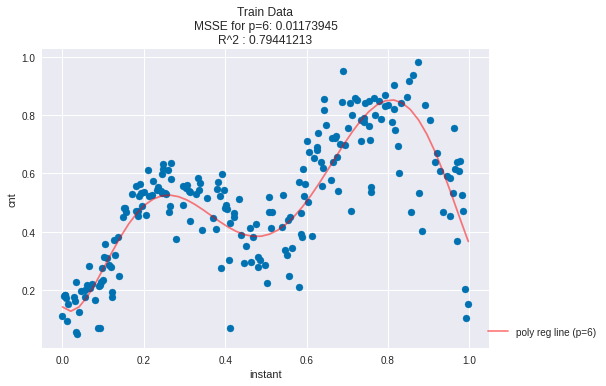

Train: R2 = 0.7093935700806481 , MSSE = 0.014773470761881957
Test: R2 = 0.7944121268956246 , MSSE = 0.011739447487780953



In [32]:
#set variable to hold p val named poly_val
poly_val = 6
#Train
norm_day_linear_reg_train = linear_regression.LinearRegression(train_day_bike_data)
norm_day_linear_reg_train.linear_regression(['instant'], 'cnt',p= poly_val)

norm_day_linear_reg_train.scatter('instant','cnt', title = f'Train Data\nMSSE for p={poly_val}: {norm_day_linear_reg_train.m_sse:.8f}')
norm_day_linear_reg_train.show()

#Test
norm_day_linear_reg_test = linear_regression.LinearRegression(test_day_bike_data)

fit_slopes =  norm_day_linear_reg_train.get_fitted_slope()
fit_intercept= norm_day_linear_reg_train.get_fitted_intercept()

norm_day_linear_reg_test.initialize(['instant'], 'cnt',slope = fit_slopes,
                       intercept = fit_intercept, p = poly_val)

norm_day_linear_reg_test.scatter('instant','cnt', title = f'Train Data\nMSSE for p={poly_val}: {norm_day_linear_reg_test.m_sse:.8f}')
norm_day_linear_reg_test.show()

#print results
print(f'Train: R2 = {norm_day_linear_reg_train.R2} , MSSE = {norm_day_linear_reg_train.m_sse}\n'+
     f'Test: R2 = {norm_day_linear_reg_test.R2} , MSSE = {norm_day_linear_reg_test.m_sse}\n')


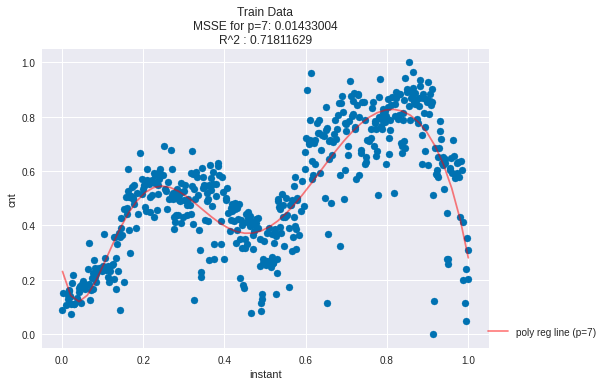

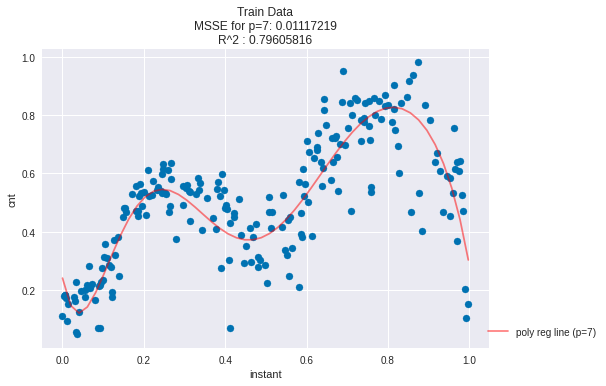

Train: R2 = 0.7181162853016474 , MSSE = 0.014330036738997038
Test: R2 = 0.7960581585386531 , MSSE = 0.011172187885616424



In [33]:
#set variable to hold p val named poly_val
poly_val = 7
#Train
norm_day_linear_reg_train = linear_regression.LinearRegression(train_day_bike_data)
norm_day_linear_reg_train.linear_regression(['instant'], 'cnt',p= poly_val)

norm_day_linear_reg_train.scatter('instant','cnt', title = f'Train Data\nMSSE for p={poly_val}: {norm_day_linear_reg_train.m_sse:.8f}')
norm_day_linear_reg_train.show()

#Test
norm_day_linear_reg_test = linear_regression.LinearRegression(test_day_bike_data)

fit_slopes =  norm_day_linear_reg_train.get_fitted_slope()
fit_intercept= norm_day_linear_reg_train.get_fitted_intercept()

norm_day_linear_reg_test.initialize(['instant'], 'cnt',slope = fit_slopes,
                       intercept = fit_intercept, p = poly_val)

norm_day_linear_reg_test.scatter('instant','cnt', title = f'Train Data\nMSSE for p={poly_val}: {norm_day_linear_reg_test.m_sse:.8f}')
norm_day_linear_reg_test.show()

#print results
print(f'Train: R2 = {norm_day_linear_reg_train.R2} , MSSE = {norm_day_linear_reg_train.m_sse}\n'+
     f'Test: R2 = {norm_day_linear_reg_test.R2} , MSSE = {norm_day_linear_reg_test.m_sse}\n')

To start on the combined multivariable poly regression, I am going to load the bike data (in scale of days) into a pandas dataframe.

In [34]:
import pandas as pd

day_bike_df = pd.read_csv('data/bike-sharing-datasets/day.csv') #make bike df dont need my updated one with var data type

day_bike_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

Now I am going to use the linear model from sklearn to do the multivariate polynomial regression

In [35]:
from sklearn import linear_model
bike_cnt_model = linear_model.LinearRegression()
